In [17]:
import numpy as np 
import os 
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt 

# C2 Results analysis

In [120]:
test_pred_prob = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/C2_square/2019-07-02_08-42-55/'
                                         , 'predictions.out'), delimiter=',')

test_classes = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/C2_square/2019-07-02_08-42-55/',
                                       'test_ground_truth_classes.txt'), delimiter=',')

In [10]:
test_pred = np.round(test_pred_prob)
LABELS_LIST = ['car', 'chill', 'club', 'dance', 'gym', 'happy', 'night', 'party', 'relax', 'running',
               'sad', 'sleep', 'summer', 'work', 'workout']

In [122]:
accuracies_perclass = sum(test_pred == test_classes) / len(test_classes)
accuracies_df = pd.DataFrame(columns= LABELS_LIST)
accuracies_df.index.astype(str, copy = False)
accuracies_df.loc[0] = accuracies_perclass

In [123]:
percentage_of_positives_perclass = sum(test_classes) / len(test_classes)
accuracies_df.loc[1] = percentage_of_positives_perclass
accuracies_df.index = ['Model Accuracy' , 'Ratio of Positive Samples']

In [124]:
accuracies_df

car     chill      club     dance       gym  \
Model Accuracy             0.611714  0.726544  0.755207  0.732419  0.652395   
Ratio of Positive Samples  0.449973  0.683194  0.401994  0.633612  0.472761   

                              happy     night     party     relax   running  \
Model Accuracy             0.670465  0.561421  0.723162  0.674292  0.630408   
Ratio of Positive Samples  0.396386  0.474453  0.628538  0.422557  0.449083   

                                sad     sleep    summer      work   workout  
Model Accuracy             0.760281  0.753249  0.630675  0.597383  0.700997  
Ratio of Positive Samples  0.396208  0.398878  0.527061  0.474275  0.398433

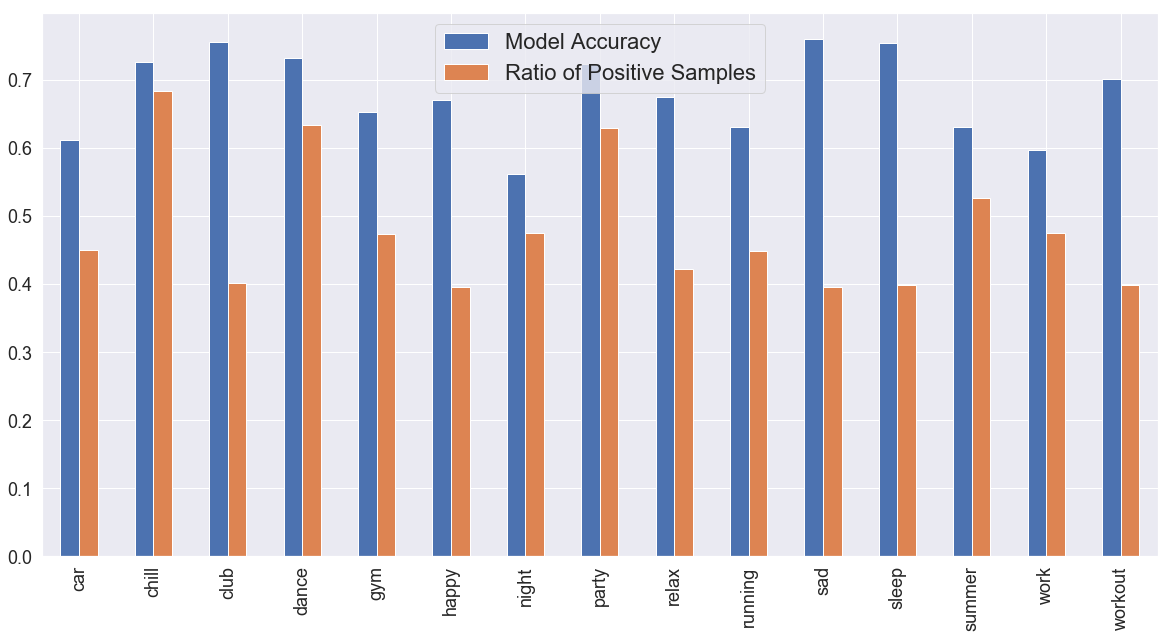

In [125]:
accuracies_df.T.plot.bar(figsize=(20,10),fontsize = 18)


In [129]:
true_positives_ratio_perclass = sum((test_pred == test_classes) *  (test_classes == 1)) / sum(test_classes)
true_positives_ratio_df = pd.DataFrame(columns= LABELS_LIST)
true_positives_ratio_df.index.astype(str, copy = False)
true_positives_ratio_df.loc[0] = true_positives_ratio_perclass
true_positives_ratio_df.loc[1] = percentage_of_positives_perclass
true_positives_ratio_df.index = ['True positives ratio (TP/sum of positive samples)', 'Ratio of Positive Samples']
true_positives_ratio_df

car     chill  \
True positives ratio (TP/sum of positive samples)  0.651236  0.935635   
Ratio of Positive Samples                          0.449973  0.683194   

                                                       club     dance  \
True positives ratio (TP/sum of positive samples)  0.709699  0.849817   
Ratio of Positive Samples                          0.401994  0.633612   

                                                        gym     happy  \
True positives ratio (TP/sum of positive samples)  0.615138  0.494947   
Ratio of Positive Samples                          0.472761  0.396386   

                                                      night     party  \
True positives ratio (TP/sum of positive samples)  0.645216  0.876221   
Ratio of Positive Samples                          0.474453  0.628538   

                                                      relax   running  \
True positives ratio (TP/sum of positive samples)  0.630293  0.563132   
Ratio of Positive Samples                          0.422557  0.449083   

                                                        sad     sleep  \
True positives ratio (TP/sum of positive samples)  0.656931  0.660567   
Ratio of Positive Samples                          0.396208  0.398878   

                                                     summer      work  \
True positives ratio (TP/sum of positive samples)  0.732984  0.571884   
Ratio of Positive Samples                          0.527061  0.474275   

                                                    workout  
True positives ratio (TP/sum of positive samples)  0.564567  
Ratio of Positive Samples                          0.398433

In [130]:
true_positives_perclass = sum((test_pred == test_classes) *  (test_classes == 1))
true_positives_df = pd.DataFrame(columns= LABELS_LIST)
true_positives_df.index.astype(str, copy = False)
true_positives_df.loc[0] = true_positives_perclass

percentage_of_positives_perclass = sum(test_classes)
true_positives_df.loc[1] = percentage_of_positives_perclass
true_positives_df.index = ['True Positives' , 'Positive Samples']

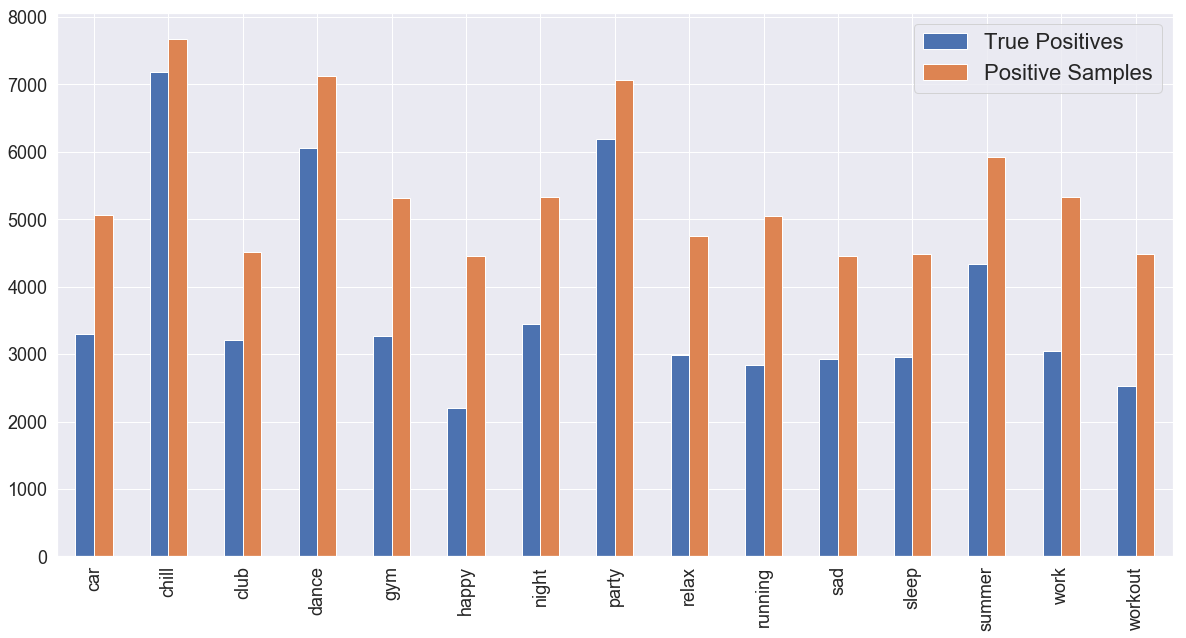

In [131]:
labels = [label + " (" + "{:.1f}".format(true_positives_ratio_perclass[idx]*100) + "%) " for idx , label in enumerate(LABELS_LIST)]
true_positives_df.columns = labels
true_positives_df.T.plot.bar(figsize=(30,20),fontsize = 30)
plt.xticks(rotation=45)
plt.title("Number of true positive per class compared to the total number of positive samples \n Average true positive rate: " + "{:.2f}".format(true_positives_ratio_perclass.mean()) )

In [132]:
# Getting coocuarances
test_pred_df = pd.DataFrame(test_pred,columns=LABELS_LIST)
coocurrances = pd.DataFrame(columns=test_pred_df.columns)
for column in test_pred_df.columns:
    coocurrances[column] = test_pred_df[test_pred_df[column] == 1 ].sum()
coocurrances = coocurrances.T

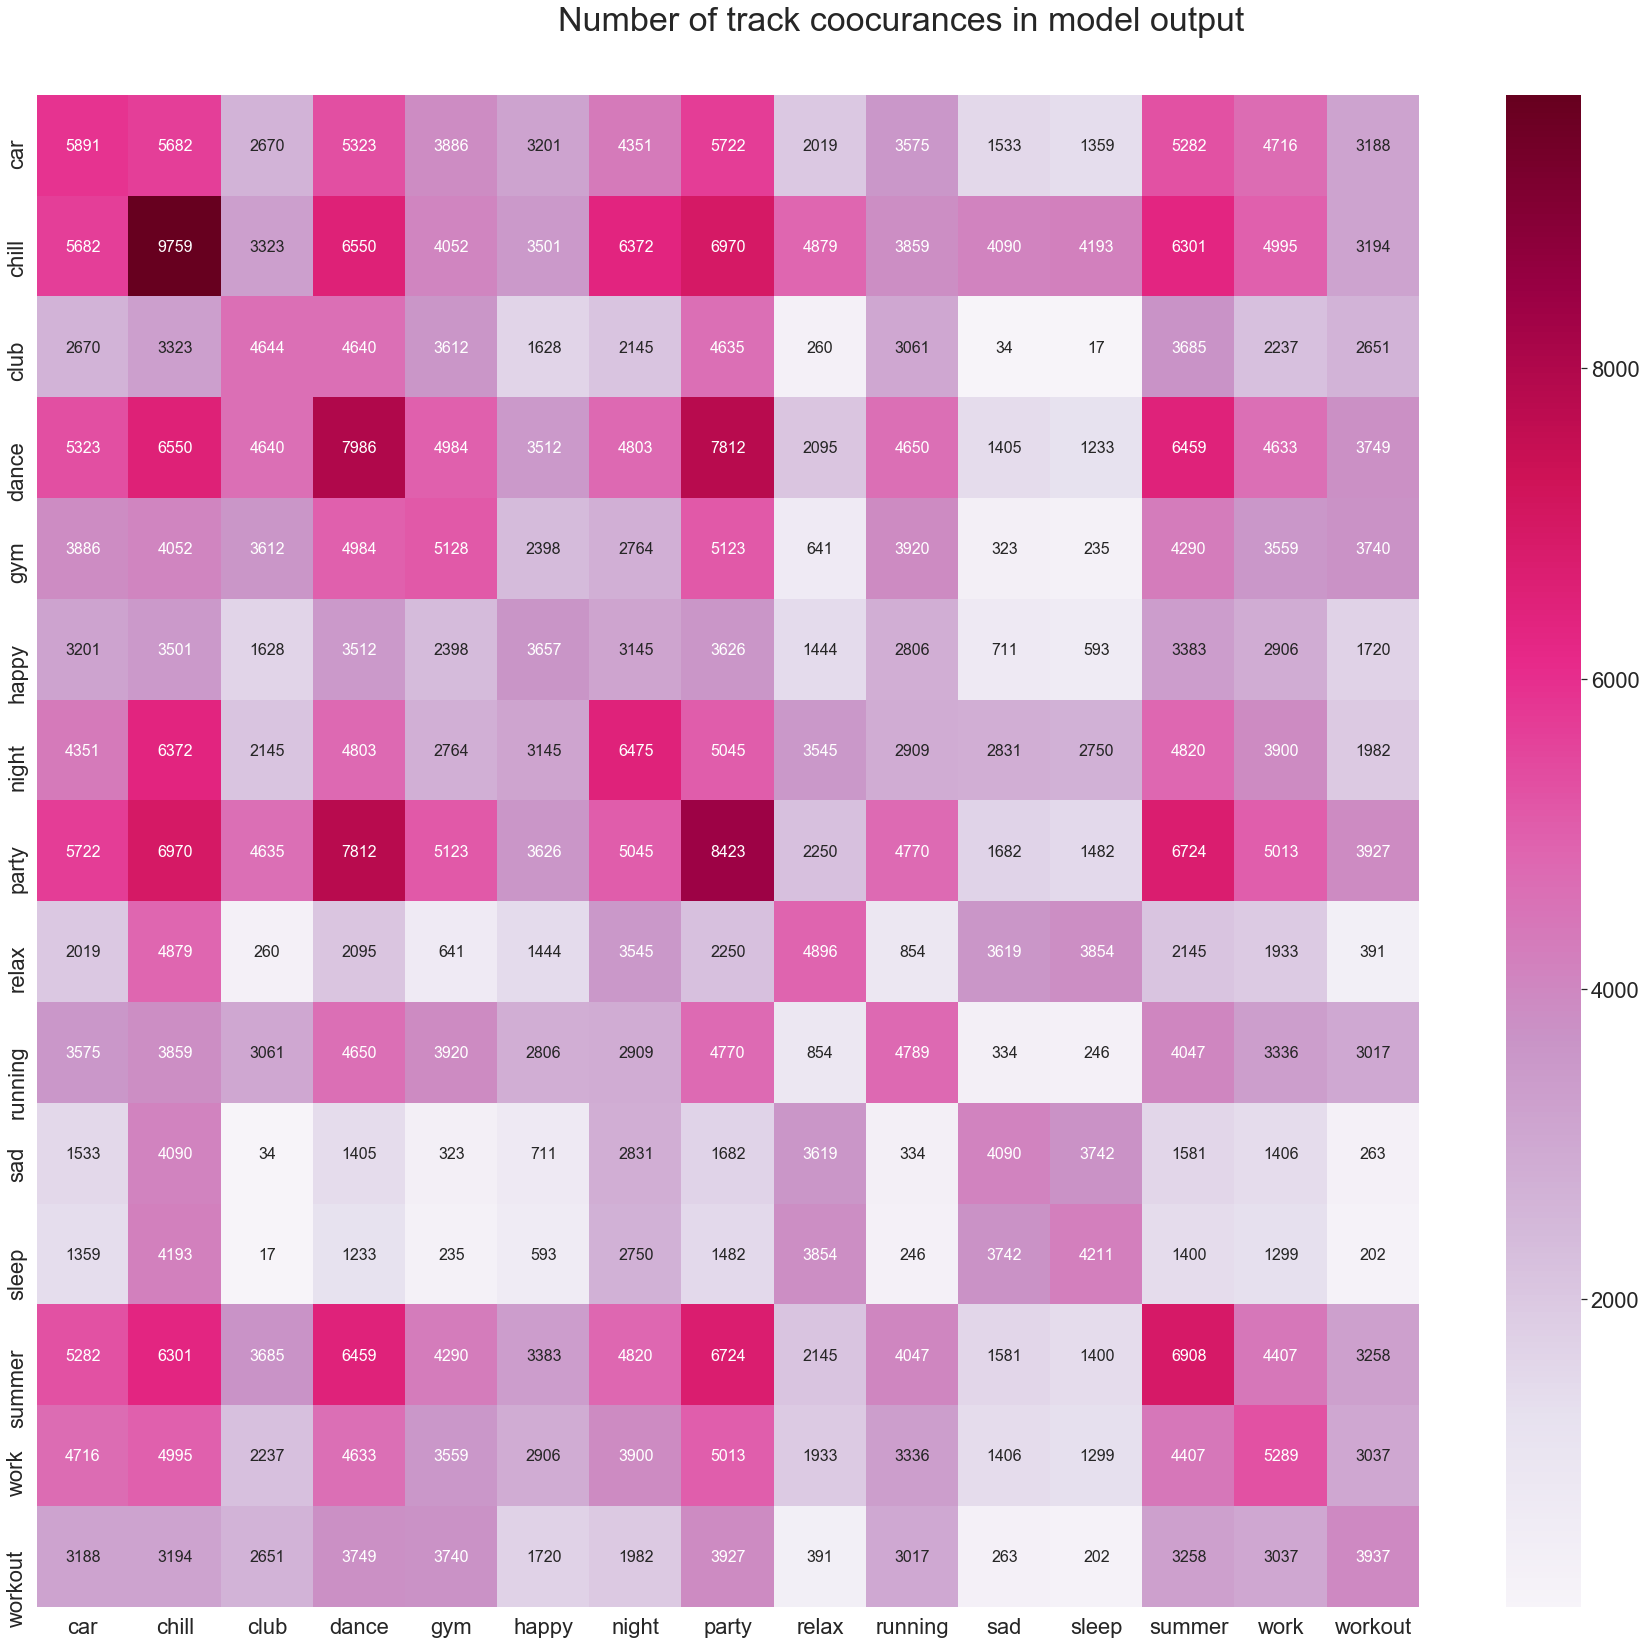

In [133]:
# Plotting coocurances
plt.figure(figsize = (30,30));
sn.set(font_scale=2)#for label size
cmap = 'PuRd'
plt.axes([.1,.1,.8,.7])
plt.figtext(.5,.83,'Number of track coocurances in model output', fontsize=34, ha='center')
#plt.figtext(.5,.81,'The ratio of the tracks in the y-axis context that are also labeled as the x-axis context',fontsize=26,ha='center')
#plt.title("Ratio of tracks shared between contexts",fontdict={"fontsize" : 40})
#plt.suptitle("Numbers show the ratio of the tracks in the y-axis context that are also labeled as the x-axis context")
sn.heatmap(coocurrances, annot=True,annot_kws={"size": 16},fmt='.0f', cmap= cmap);

In [134]:
false_positives_ratio_perclass = sum((test_pred != test_classes) *  (test_classes == 1)) / sum(test_classes)
false_positives_ratio_df = pd.DataFrame(columns= LABELS_LIST)
false_positives_ratio_df.index.astype(str, copy = False)
false_positives_ratio_df.loc[0] = false_positives_ratio_perclass
#false_positives_ratio_df.loc[1] = percentage_of_positives_perclass
false_positives_ratio_df

car     chill      club     dance       gym     happy     night  \
0  0.348764  0.064365  0.290301  0.150183  0.384862  0.505053  0.354784   

      party     relax   running       sad     sleep    summer      work  \
0  0.123779  0.369707  0.436868  0.343069  0.339433  0.267016  0.428116   

    workout  
0  0.435433

In [115]:
# Getting coocuarances
test_pred_df = pd.DataFrame(test_pred,columns=LABELS_LIST)
test_classes_df = pd.DataFrame(test_classes,columns=LABELS_LIST)
FN_coocurrances = pd.DataFrame(columns=test_pred_df.columns)
for column in test_pred_df.columns:
    FN_coocurrances[column] = test_pred_df[[negative_prediction and positive_sample 
                                            for negative_prediction, positive_sample in 
                                            zip(test_pred_df[column] == 0, test_classes_df[column] == 1)]].sum()
FN_coocurrances = FN_coocurrances.T

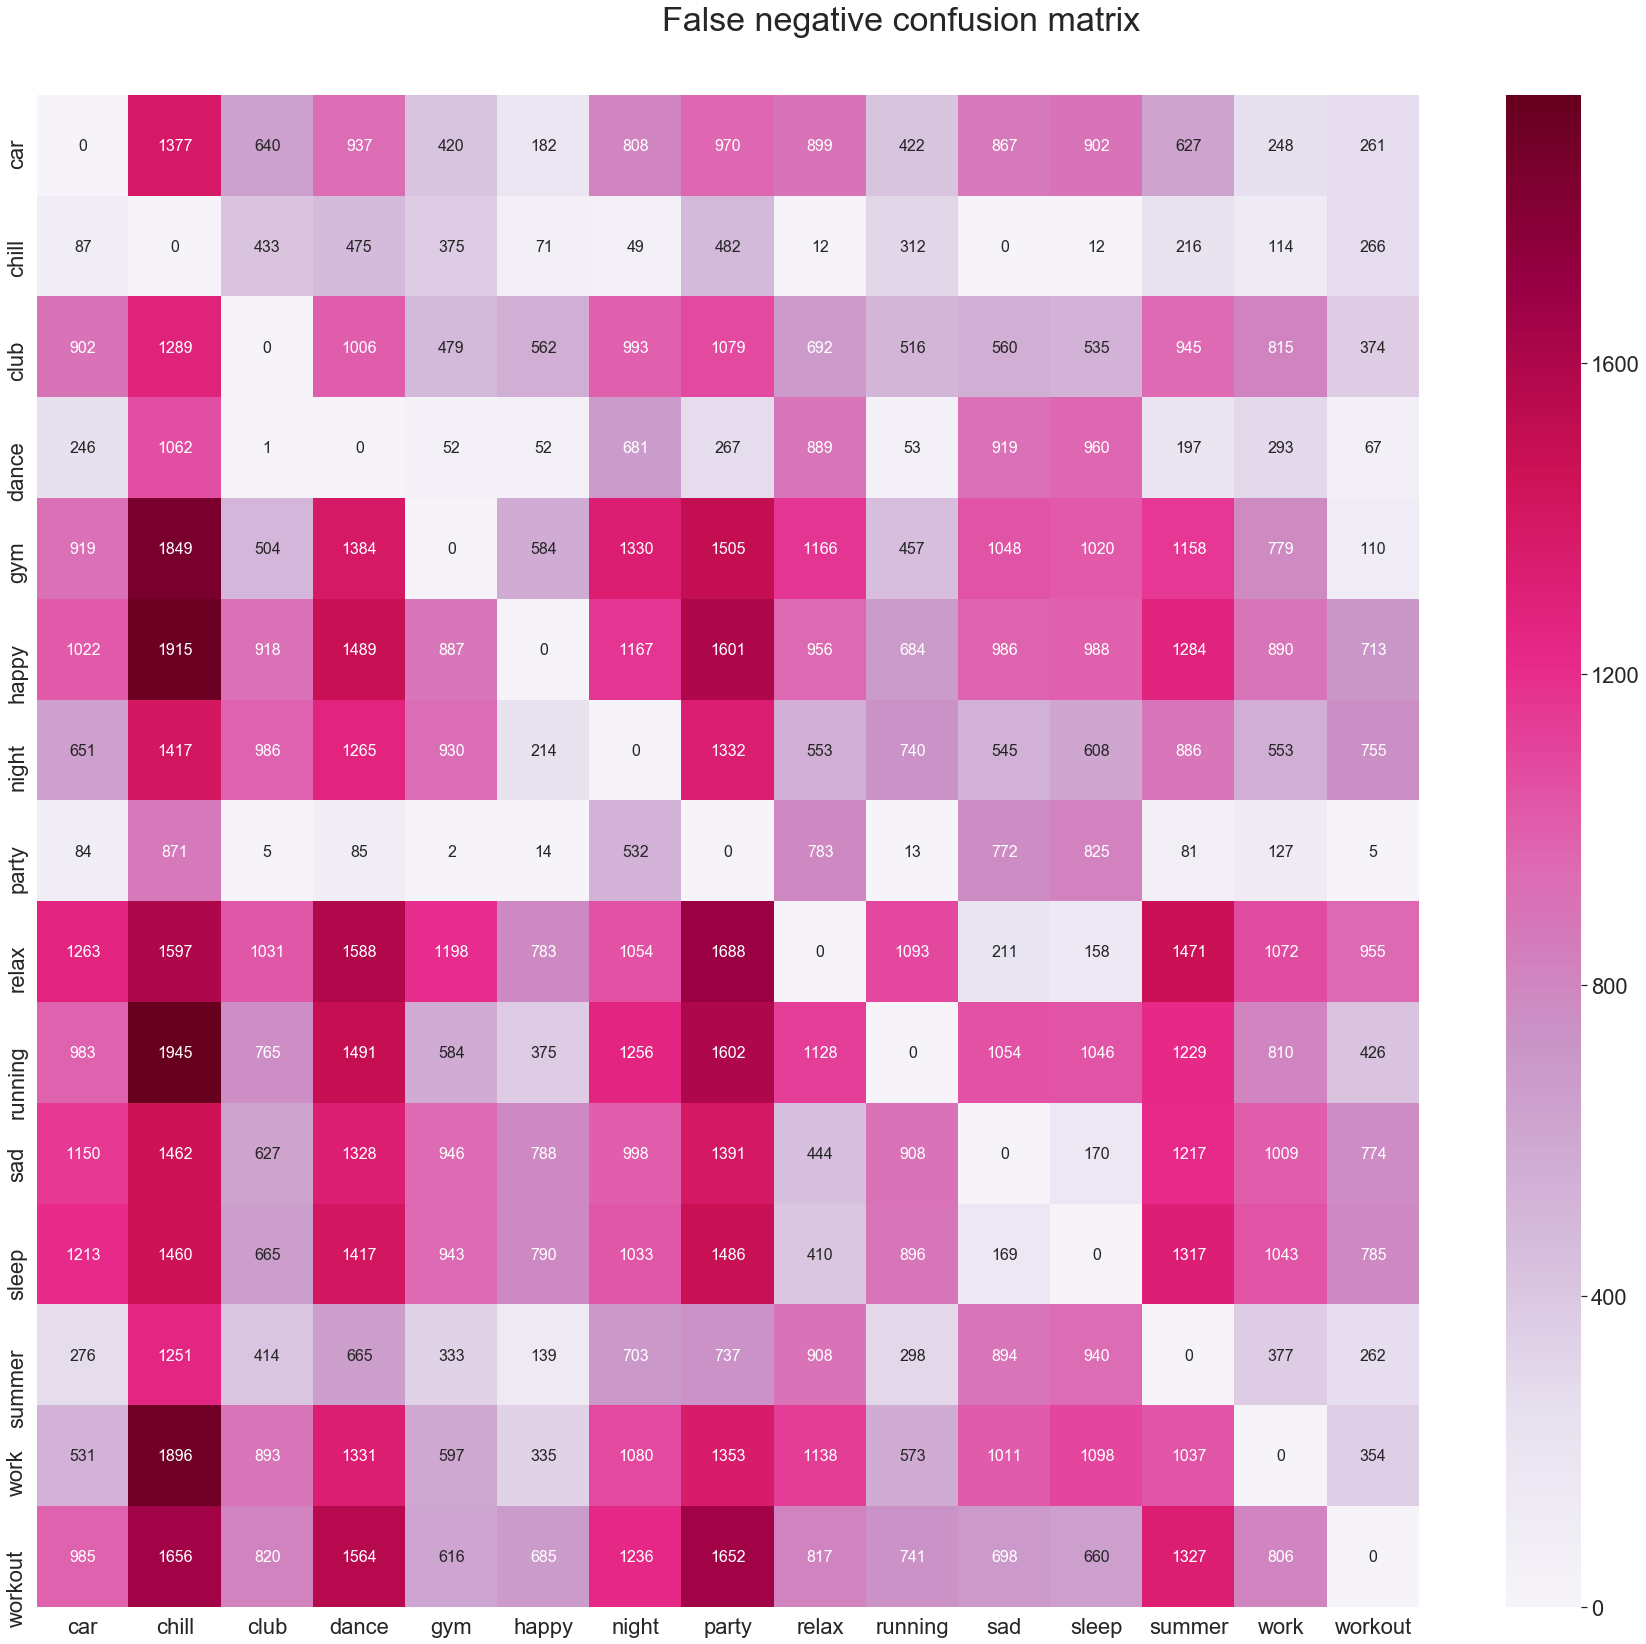

In [118]:
# Plotting coocurances
import seaborn as sn
import matplotlib.pyplot as plt 
plt.figure(figsize = (30,30));
sn.set(font_scale=2)#for label size
cmap = 'PuRd'
plt.axes([.1,.1,.8,.7])
plt.figtext(.5,.83,'False negative confusion matrix', fontsize=34, ha='center')
#plt.figtext(.5,.81,'The ratio of the tracks in the y-axis context that are also labeled as the x-axis context',fontsize=26,ha='center')
#plt.title("Ratio of tracks shared between contexts",fontdict={"fontsize" : 40})
#plt.suptitle("Numbers show the ratio of the tracks in the y-axis context that are also labeled as the x-axis context")
sn.heatmap(FN_coocurrances, annot=True,annot_kws={"size": 16},fmt='.0f', cmap= cmap);

## C4 Old test set performance

In [259]:
test_pred_prob = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/C4_square/2019-07-02_10-30-38/'
                                         , 'oldpredictions.out'), delimiter=',')

test_classes = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/C4_square/2019-07-02_10-30-38/',
                                       'oldtest_ground_truth_classes.txt'), delimiter=',')

In [260]:
test_pred = np.round(test_pred_prob)
LABELS_LIST = ['car', 'chill', 'club', 'dance', 'gym', 'happy', 'night', 'party', 'relax', 'running',
               'sad', 'sleep', 'summer', 'work', 'workout']

In [261]:
accuracies_perclass = sum(test_pred == test_classes) / len(test_classes)
accuracies_df = pd.DataFrame(columns= LABELS_LIST)
accuracies_df.index.astype(str, copy = False)
accuracies_df.loc[0] = accuracies_perclass

In [262]:
percentage_of_positives_perclass = sum(test_classes) / len(test_classes)
accuracies_df.loc[1] = percentage_of_positives_perclass
accuracies_df.index = ['Model Accuracy' , 'Ratio of Positive Samples']

In [263]:
accuracies_df

car     chill      club     dance       gym  \
Model Accuracy             0.597726  0.620584  0.678768  0.681824  0.568268   
Ratio of Positive Samples  0.214155  0.466691  0.087153  0.514974  0.253270   

                              happy     night     party     relax   running  \
Model Accuracy             0.667522  0.648454  0.607016  0.731818  0.520719   
Ratio of Positive Samples  0.128102  0.160983  0.482948  0.194964  0.206332   

                                sad     sleep    summer      work   workout  
Model Accuracy             0.750764  0.715072  0.575235  0.529153  0.667278  
Ratio of Positive Samples  0.129813  0.083608  0.277105  0.211343  0.210365

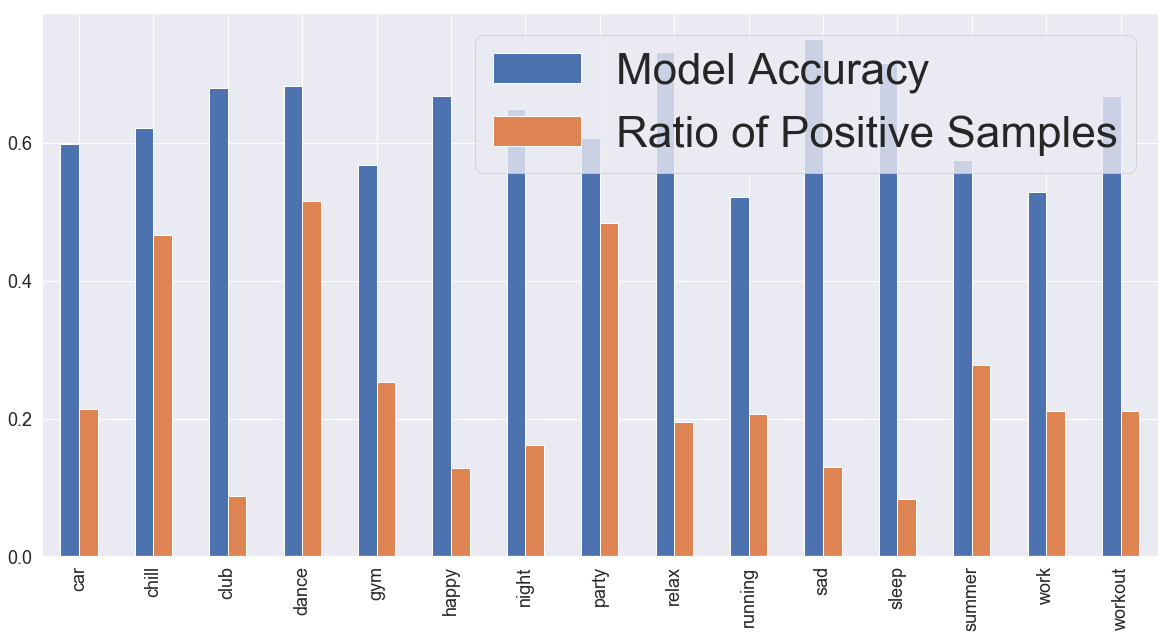

In [264]:
accuracies_df.T.plot.bar(figsize=(20,10),fontsize = 18)

In [265]:
true_positives_ratio_perclass = sum((test_pred == test_classes) *  (test_classes == 1)) / sum(test_classes)
true_positives_ratio_df = pd.DataFrame(columns= LABELS_LIST)
true_positives_ratio_df.index.astype(str, copy = False)
true_positives_ratio_df.loc[0] = true_positives_ratio_perclass
true_positives_ratio_df.loc[1] = percentage_of_positives_perclass
true_positives_ratio_df.index = ['True positives ratio (TP/sum of positive samples)', 'Ratio of Positive Samples']
true_positives_ratio_df

car     chill  \
True positives ratio (TP/sum of positive samples)  0.552511  0.916972   
Ratio of Positive Samples                          0.214155  0.466691   

                                                       club     dance  \
True positives ratio (TP/sum of positive samples)  0.530154  0.829812   
Ratio of Positive Samples                          0.087153  0.514974   

                                                        gym     happy  \
True positives ratio (TP/sum of positive samples)  0.725869  0.480916   
Ratio of Positive Samples                          0.253270  0.128102   

                                                      night     party  \
True positives ratio (TP/sum of positive samples)  0.378891  0.870919   
Ratio of Positive Samples                          0.160983  0.482948   

                                                      relax   running  \
True positives ratio (TP/sum of positive samples)  0.611285  0.680687   
Ratio of Positive Samples                          0.194964  0.206332   

                                                        sad     sleep  \
True positives ratio (TP/sum of positive samples)  0.771186  0.767544   
Ratio of Positive Samples                          0.129813  0.083608   

                                                     summer      work  \
True positives ratio (TP/sum of positive samples)  0.611822  0.636206   
Ratio of Positive Samples                          0.277105  0.211343   

                                                    workout  
True positives ratio (TP/sum of positive samples)  0.686810  
Ratio of Positive Samples                          0.210365

In [266]:
true_positives_perclass = sum((test_pred == test_classes) *  (test_classes == 1))
true_positives_df = pd.DataFrame(columns= LABELS_LIST)
true_positives_df.index.astype(str, copy = False)
true_positives_df.loc[0] = true_positives_perclass

percentage_of_positives_perclass = sum(test_classes)
true_positives_df.loc[1] = percentage_of_positives_perclass
true_positives_df.index = ['True Positives' , 'Positive Samples']

Text(0.5, 1.0, 'Number of true positive per class compared to the total number of positive samples \n [unbalanced] Average true positive rate: 0.67')

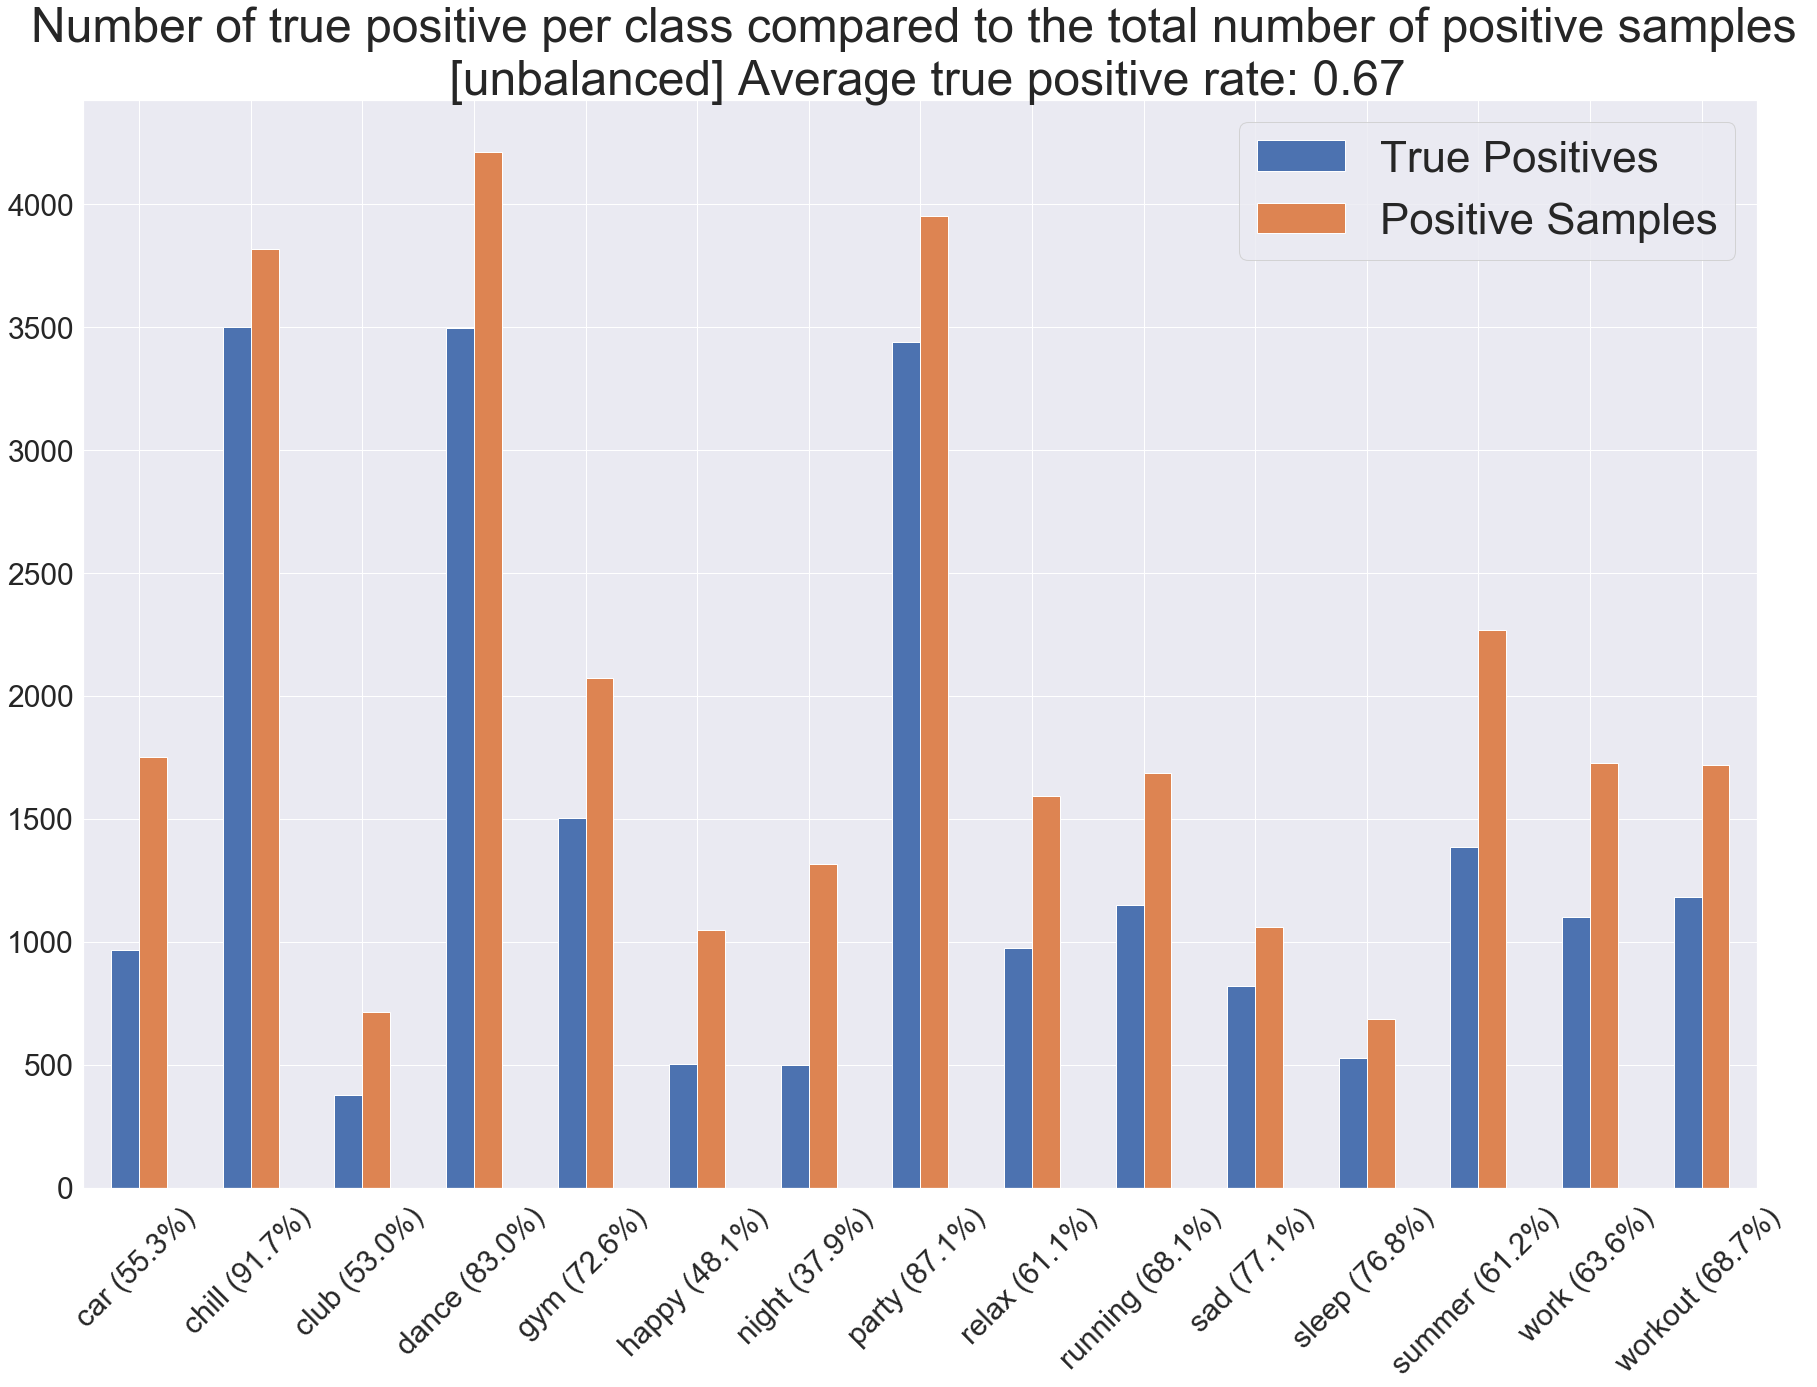

In [268]:
labels = [label + " (" + "{:.1f}".format(true_positives_ratio_perclass[idx]*100) + "%) " for idx , label in enumerate(LABELS_LIST)]
true_positives_df.columns = labels
true_positives_df.T.plot.bar(figsize=(30,20),fontsize = 30)
plt.xticks(rotation=45)
plt.title("Number of true positive per class compared to the total number of positive samples \n [unbalanced] Average true positive rate: " + "{:.2f}".format(true_positives_ratio_perclass.mean()) )

In [221]:
# Getting coocuarances
test_pred_df = pd.DataFrame(test_pred,columns=LABELS_LIST)
coocurrances = pd.DataFrame(columns=test_pred_df.columns)
for column in test_pred_df.columns:
    coocurrances[column] = test_pred_df[test_pred_df[column] == 1 ].sum()
coocurrances = coocurrances.T

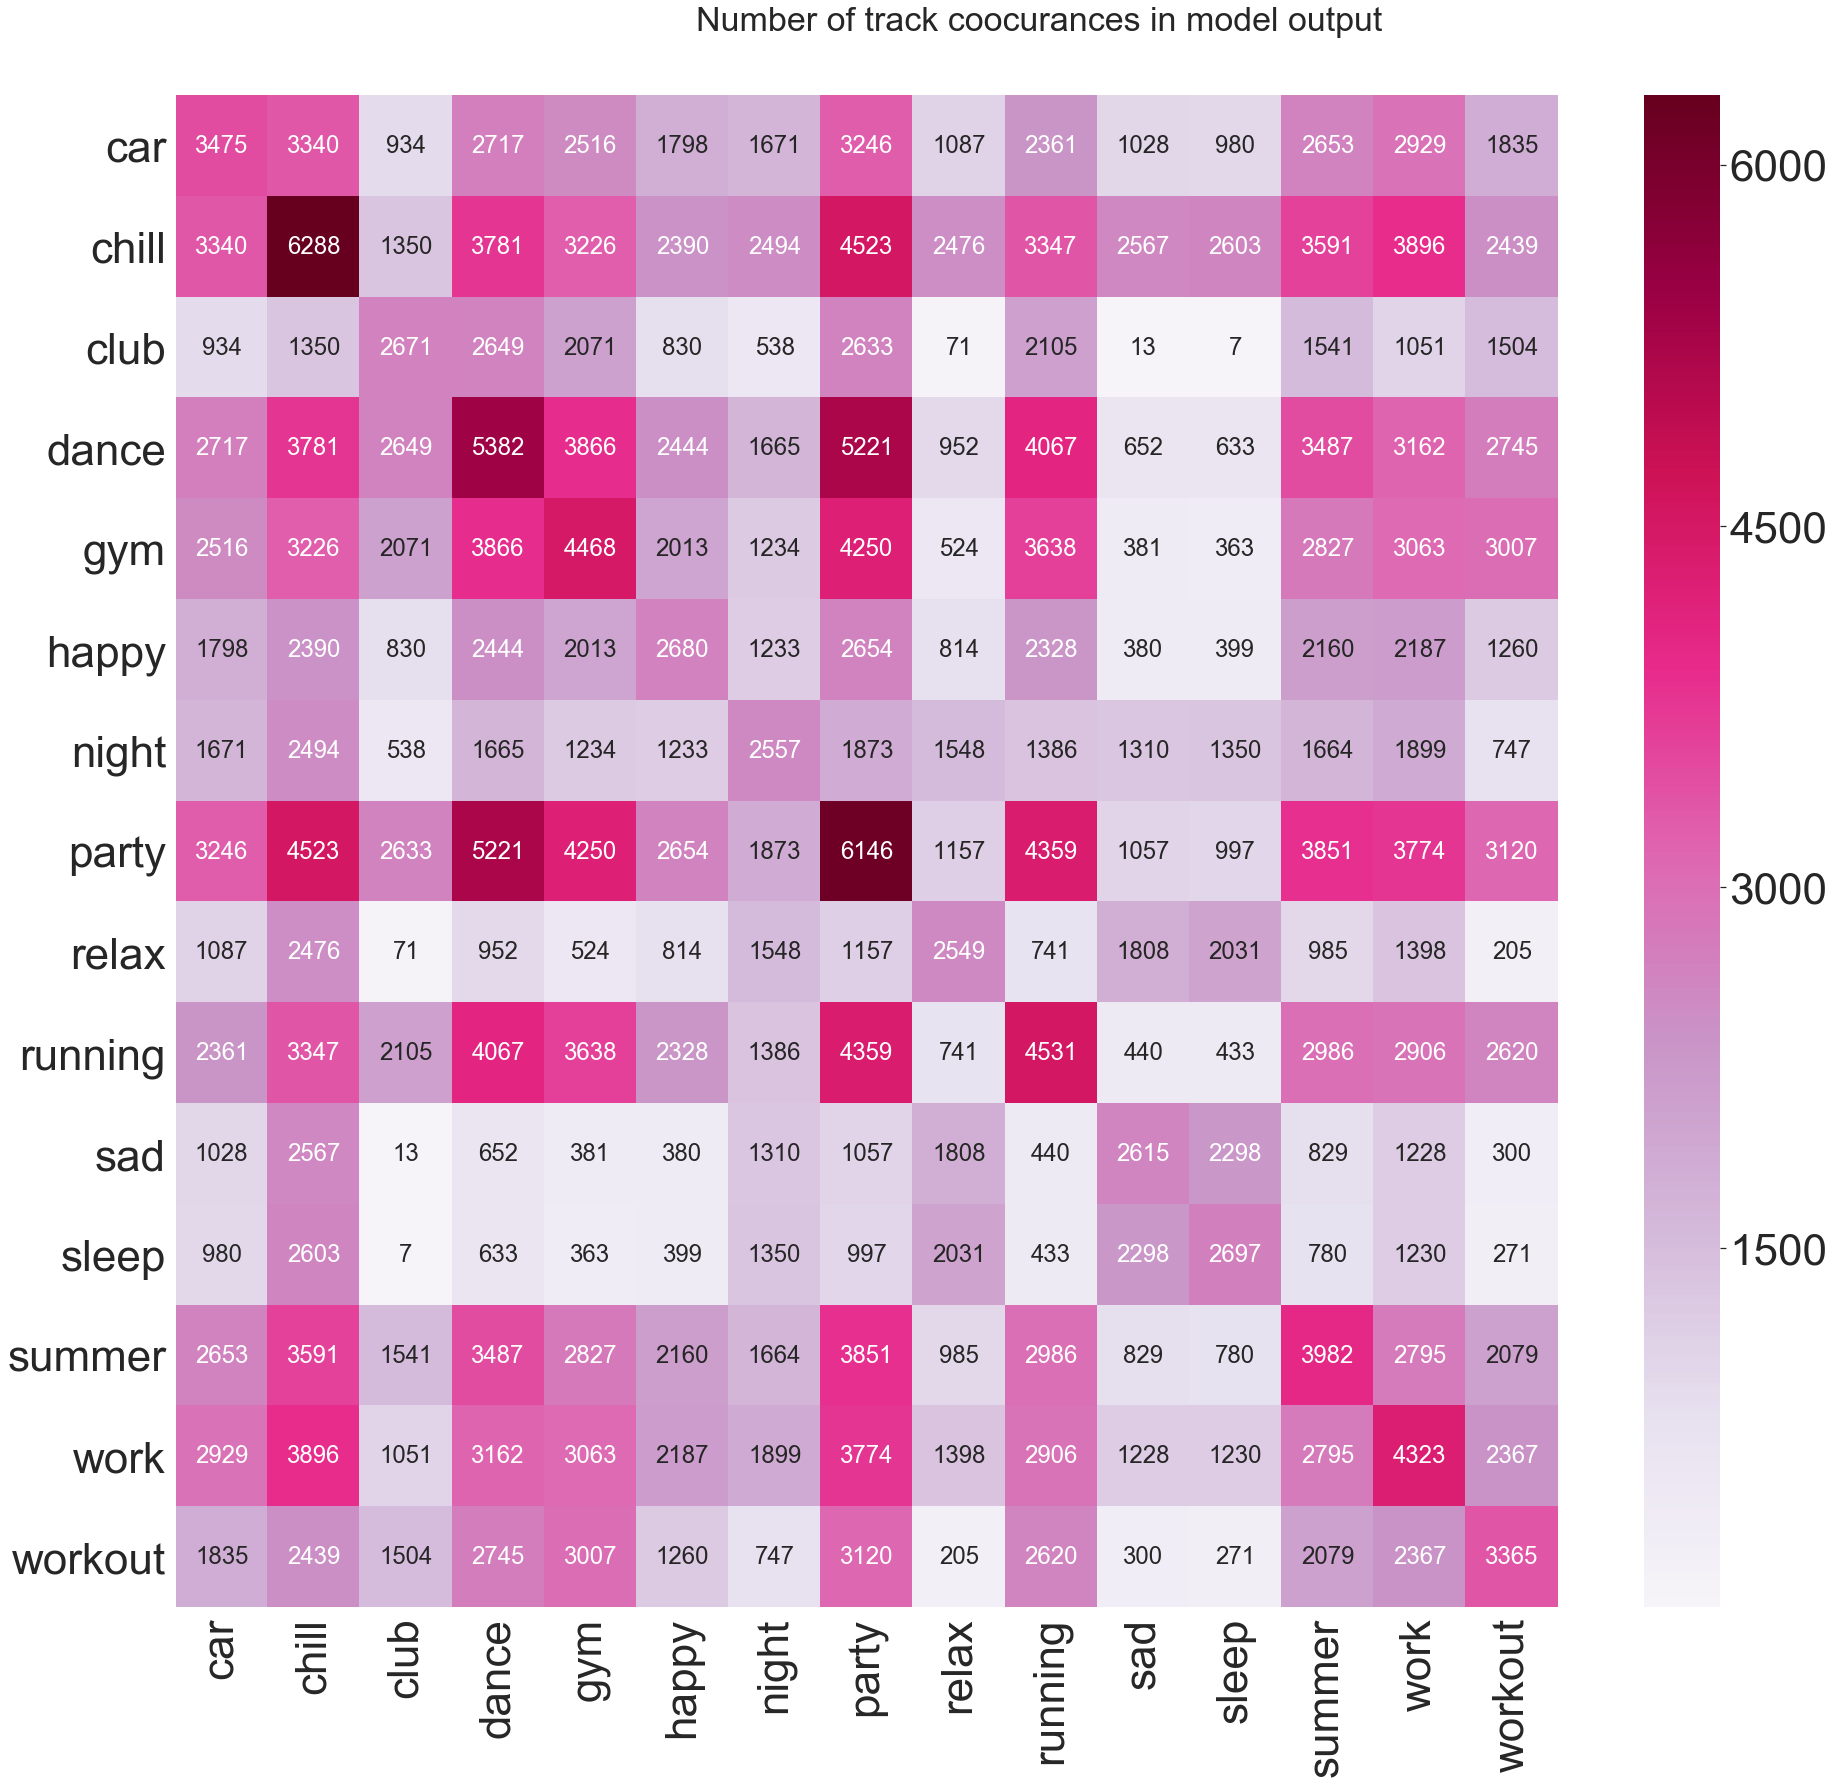

In [222]:
# Plotting coocurances
plt.figure(figsize = (30,30));
sn.set(font_scale=4)#for label size
cmap = 'PuRd'
plt.axes([.1,.1,.8,.7])
plt.figtext(.5,.83,'Number of track coocurances in model output', fontsize=34, ha='center')
#plt.figtext(.5,.81,'The ratio of the tracks in the y-axis context that are also labeled as the x-axis context',fontsize=26,ha='center')
#plt.title("Ratio of tracks shared between contexts",fontdict={"fontsize" : 40})
#plt.suptitle("Numbers show the ratio of the tracks in the y-axis context that are also labeled as the x-axis context")
sn.heatmap(coocurrances, annot=True,annot_kws={"size": 24},fmt='.0f', cmap= cmap);

In [227]:
false_positives_ratio_perclass = sum((test_pred != test_classes) *  (test_classes == 1)) / sum(test_classes)
false_positives_ratio_df = pd.DataFrame(columns= LABELS_LIST)
false_positives_ratio_df.index.astype(str, copy = False)
false_positives_ratio_df.loc[0] = false_positives_ratio_perclass
#false_positives_ratio_df.loc[1] = percentage_of_positives_perclass
false_positives_ratio_df

car     chill      club     dance       gym     happy     night  \
0  0.447489  0.083028  0.469846  0.170188  0.274131  0.519084  0.621109   

      party     relax   running       sad     sleep    summer      work  \
0  0.129081  0.388715  0.319313  0.228814  0.232456  0.388178  0.363794   

   workout  
0  0.31319

In [228]:
# Getting coocuarances
test_pred_df = pd.DataFrame(test_pred,columns=LABELS_LIST)
test_classes_df = pd.DataFrame(test_classes,columns=LABELS_LIST)
FN_coocurrances = pd.DataFrame(columns=test_pred_df.columns)
for column in test_pred_df.columns:
    FN_coocurrances[column] = test_pred_df[[negative_prediction and positive_sample 
                                            for negative_prediction, positive_sample in 
                                            zip(test_pred_df[column] == 0, test_classes_df[column] == 1)]].sum()
FN_coocurrances = FN_coocurrances.T

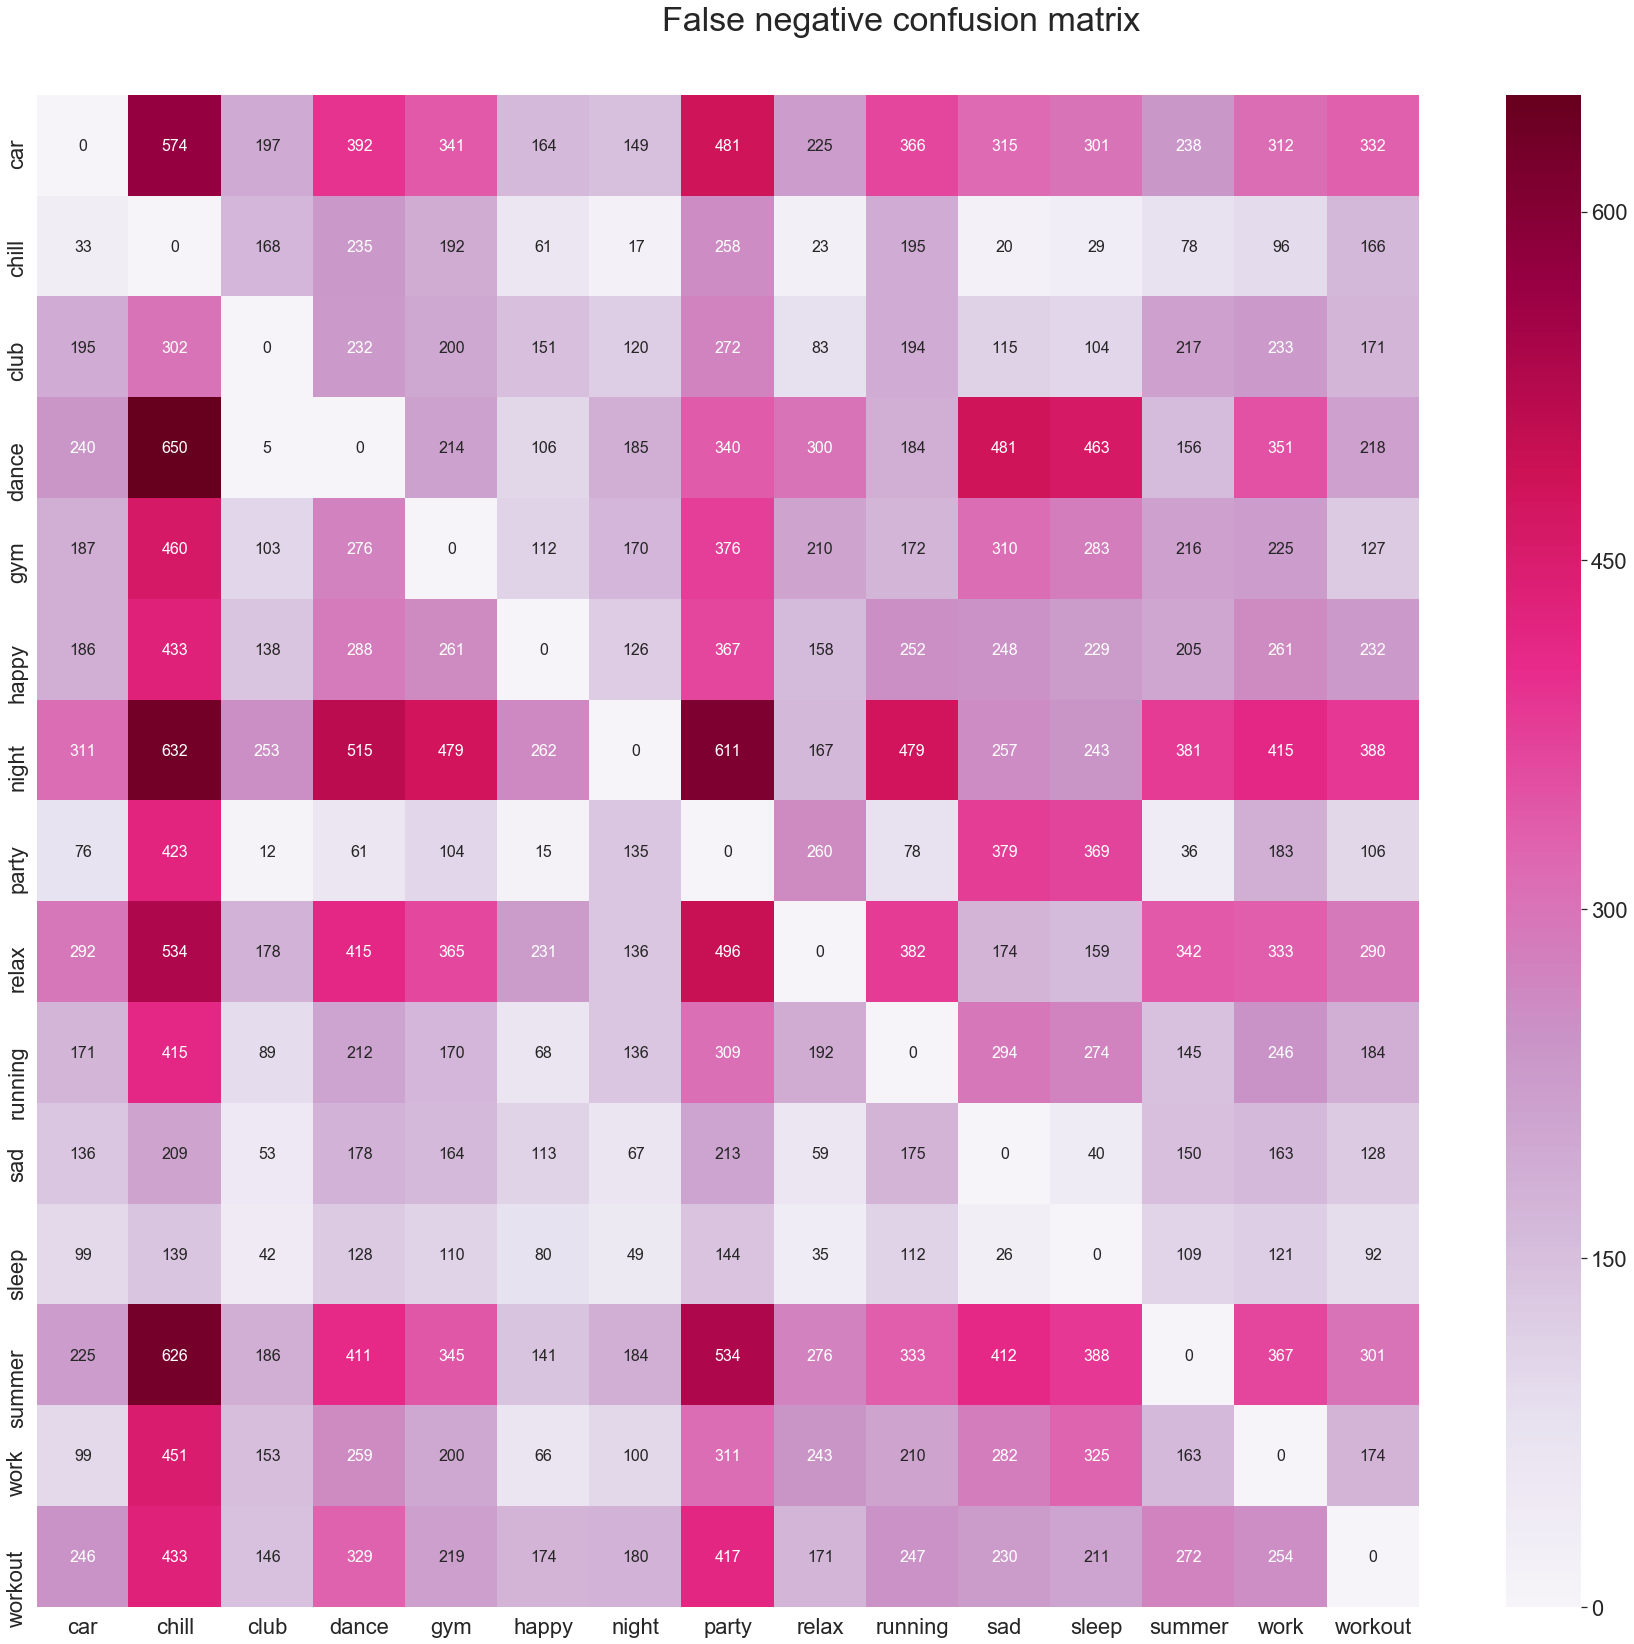

In [229]:
# Plotting coocurances
import seaborn as sn
import matplotlib.pyplot as plt 
plt.figure(figsize = (30,30));
sn.set(font_scale=2)#for label size
cmap = 'PuRd'
plt.axes([.1,.1,.8,.7])
plt.figtext(.5,.83,'False negative confusion matrix', fontsize=34, ha='center')
#plt.figtext(.5,.81,'The ratio of the tracks in the y-axis context that are also labeled as the x-axis context',fontsize=26,ha='center')
#plt.title("Ratio of tracks shared between contexts",fontdict={"fontsize" : 40})
#plt.suptitle("Numbers show the ratio of the tracks in the y-axis context that are also labeled as the x-axis context")
sn.heatmap(FN_coocurrances, annot=True,annot_kws={"size": 16},fmt='.0f', cmap= cmap);

In [230]:
true_positives_ratio_perclass.mean()

0.6701057200832057

In [231]:
# Getting coocuarances
test_classes_df = pd.DataFrame(test_classes,columns=LABELS_LIST)
coocurrances = pd.DataFrame(columns=test_classes_df.columns)
for column in test_classes_df.columns:
    coocurrances[column] = test_classes_df[test_classes_df[column] == 1].sum()
coocurrances = coocurrances.T

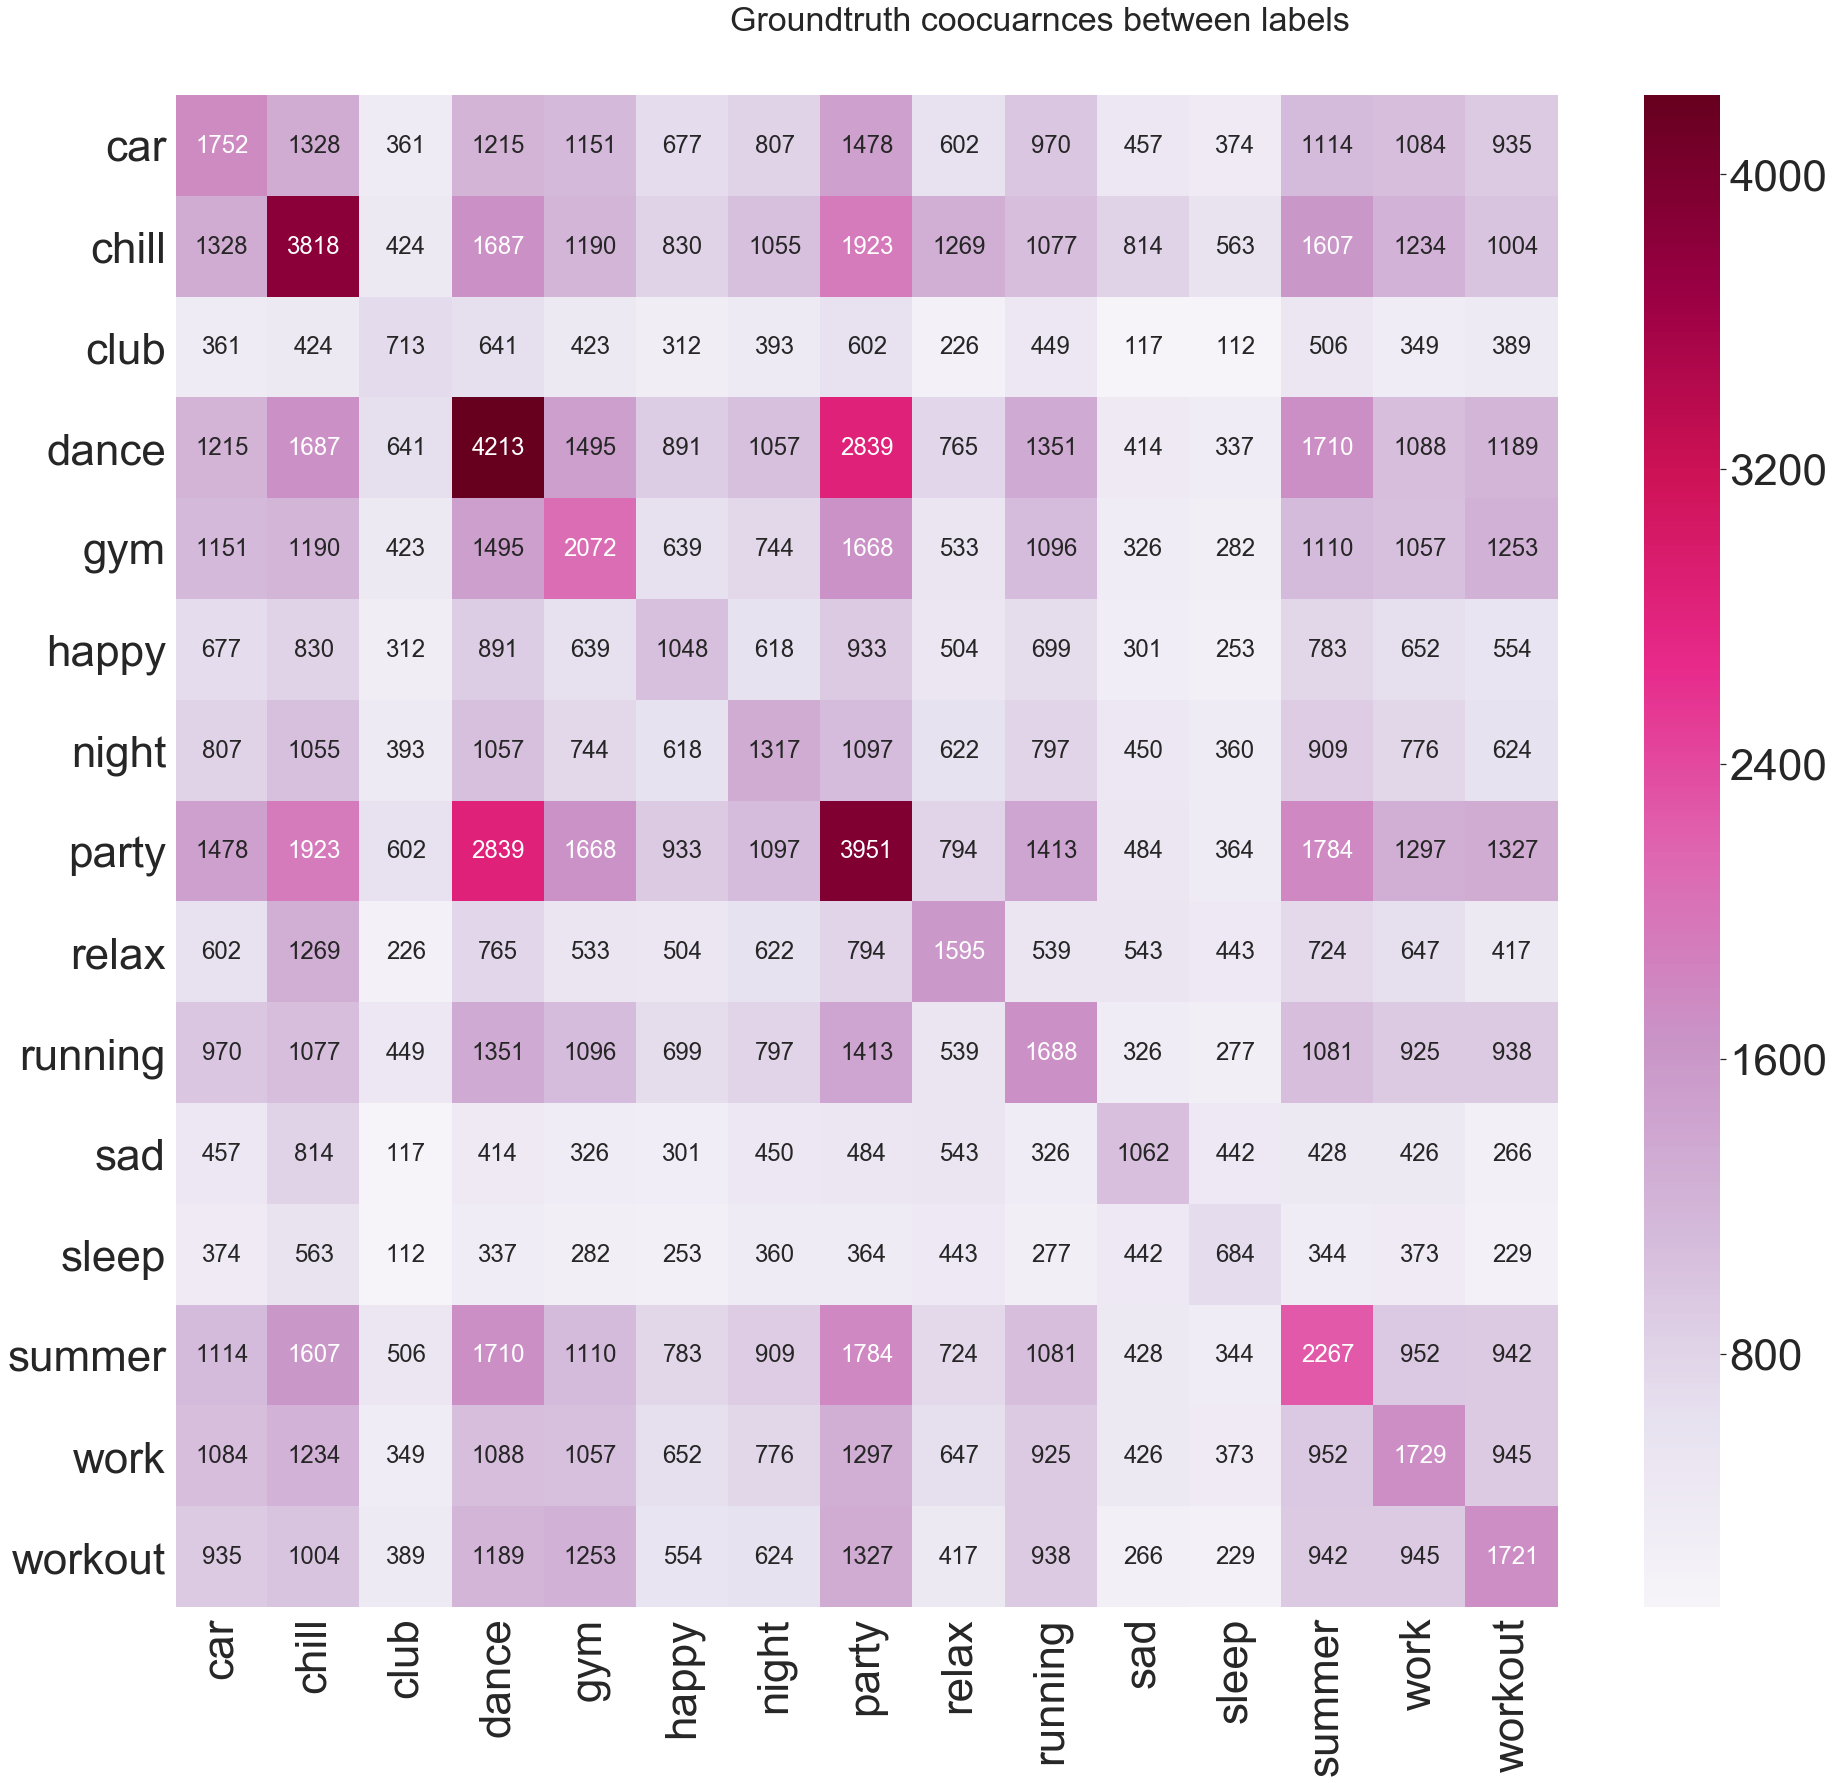

In [232]:
# Plotting coocurances
import seaborn as sn
import matplotlib.pyplot as plt 
plt.figure(figsize = (30,30));
sn.set(font_scale=4)#for label size
cmap = 'PuRd'
plt.axes([.1,.1,.8,.7])
plt.figtext(.5,.83,'Groundtruth coocuarnces between labels', fontsize=34, ha='center')
#plt.figtext(.5,.81,'The ratio of the tracks in the y-axis context that are also labeled as the x-axis context',fontsize=26,ha='center')
#plt.title("Ratio of tracks shared between contexts",fontdict={"fontsize" : 40})
#plt.suptitle("Numbers show the ratio of the tracks in the y-axis context that are also labeled as the x-axis context")
sn.heatmap(coocurrances, annot=True,annot_kws={"size": 24},fmt='.0f', cmap= cmap);

## C4 results

In [269]:
test_pred_prob = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/C4_square/2019-07-02_10-30-38/'
                                         , 'predictions.out'), delimiter=',')

test_classes = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/C4_square/2019-07-02_10-30-38/',
                                       'test_ground_truth_classes.txt'), delimiter=',')

In [270]:
test_pred = np.round(test_pred_prob)
LABELS_LIST = ['car', 'chill', 'club', 'dance', 'gym', 'happy', 'night', 'party', 'relax', 'running',
               'sad', 'sleep', 'summer', 'work', 'workout']

In [252]:
accuracies_perclass = sum(test_pred == test_classes) / len(test_classes)
accuracies_df = pd.DataFrame(columns= LABELS_LIST)
accuracies_df.index.astype(str, copy = False)
accuracies_df.loc[0] = accuracies_perclass

In [253]:
percentage_of_positives_perclass = sum(test_classes) / len(test_classes)
accuracies_df.loc[1] = percentage_of_positives_perclass
accuracies_df.index = ['Model Accuracy' , 'Ratio of Positive Samples']

In [254]:
accuracies_df

car     chill      club     dance       gym  \
Model Accuracy             0.613228  0.729749  0.767492  0.737048  0.659694   
Ratio of Positive Samples  0.449973  0.683194  0.401994  0.633612  0.472761   

                              happy     night     party     relax   running  \
Model Accuracy             0.690226  0.562044  0.730728  0.675450  0.633612   
Ratio of Positive Samples  0.396386  0.474453  0.628538  0.422557  0.449083   

                                sad     sleep    summer      work   workout  
Model Accuracy             0.775503  0.759124  0.632722  0.595336  0.706783  
Ratio of Positive Samples  0.396208  0.398878  0.527061  0.474275  0.398433

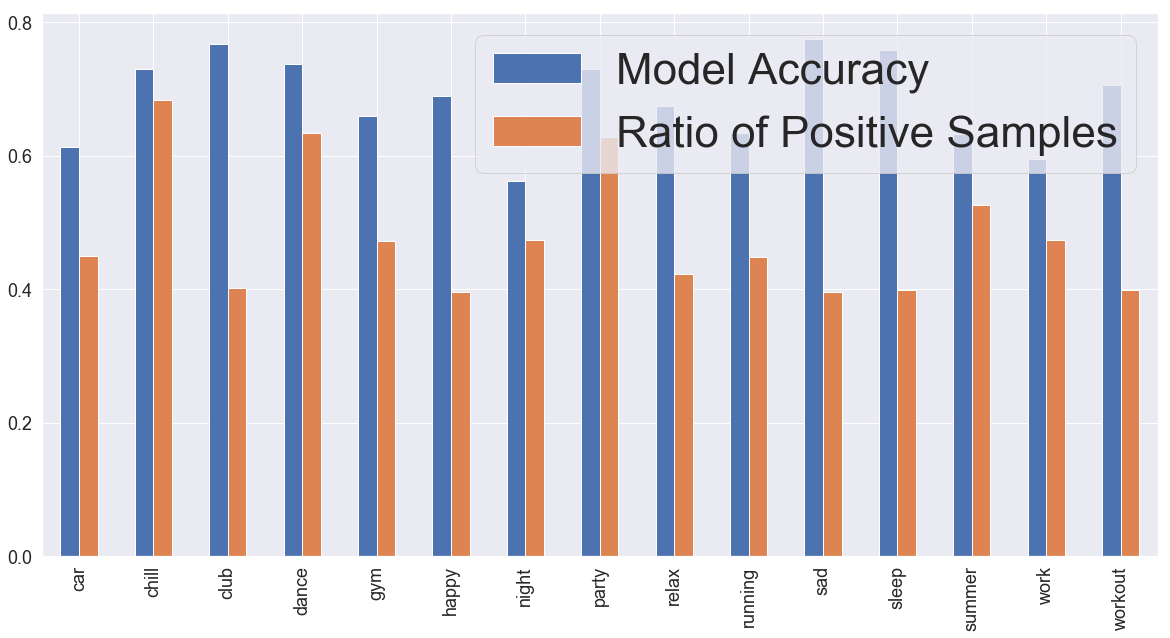

In [255]:
accuracies_df.T.plot.bar(figsize=(20,10),fontsize = 18)


In [256]:
true_positives_ratio_perclass = sum((test_pred == test_classes) *  (test_classes == 1)) / sum(test_classes)
true_positives_ratio_df = pd.DataFrame(columns= LABELS_LIST)
true_positives_ratio_df.index.astype(str, copy = False)
true_positives_ratio_df.loc[0] = true_positives_ratio_perclass
true_positives_ratio_df.loc[1] = percentage_of_positives_perclass
true_positives_ratio_df.index = ['True positives ratio (TP/sum of positive samples)', 'Ratio of Positive Samples']
true_positives_ratio_df

car     chill  \
True positives ratio (TP/sum of positive samples)  0.548170  0.917915   
Ratio of Positive Samples                          0.449973  0.683194   

                                                       club     dance  \
True positives ratio (TP/sum of positive samples)  0.640390  0.819753   
Ratio of Positive Samples                          0.401994  0.633612   

                                                        gym     happy  \
True positives ratio (TP/sum of positive samples)  0.652796  0.522344   
Ratio of Positive Samples                          0.472761  0.396386   

                                                      night     party  \
True positives ratio (TP/sum of positive samples)  0.416698  0.865317   
Ratio of Positive Samples                          0.474453  0.628538   

                                                      relax   running  \
True positives ratio (TP/sum of positive samples)  0.586476  0.640436   
Ratio of Positive Samples                          0.422557  0.449083   

                                                        sad     sleep  \
True positives ratio (TP/sum of positive samples)  0.698045  0.684445   
Ratio of Positive Samples                          0.396208  0.398878   

                                                     summer      work  \
True positives ratio (TP/sum of positive samples)  0.732815  0.576389   
Ratio of Positive Samples                          0.527061  0.474275   

                                                    workout  
True positives ratio (TP/sum of positive samples)  0.567471  
Ratio of Positive Samples                          0.398433

In [257]:
true_positives_perclass = sum((test_pred == test_classes) *  (test_classes == 1))
true_positives_df = pd.DataFrame(columns= LABELS_LIST)
true_positives_df.index.astype(str, copy = False)
true_positives_df.loc[0] = true_positives_perclass

percentage_of_positives_perclass = sum(test_classes)
true_positives_df.loc[1] = percentage_of_positives_perclass
true_positives_df.index = ['True Positives' , 'Positive Samples']

Text(0.5, 1.0, 'Number of true positive per class compared to the total number of positive samples \n Average true positive rate: 0.66')

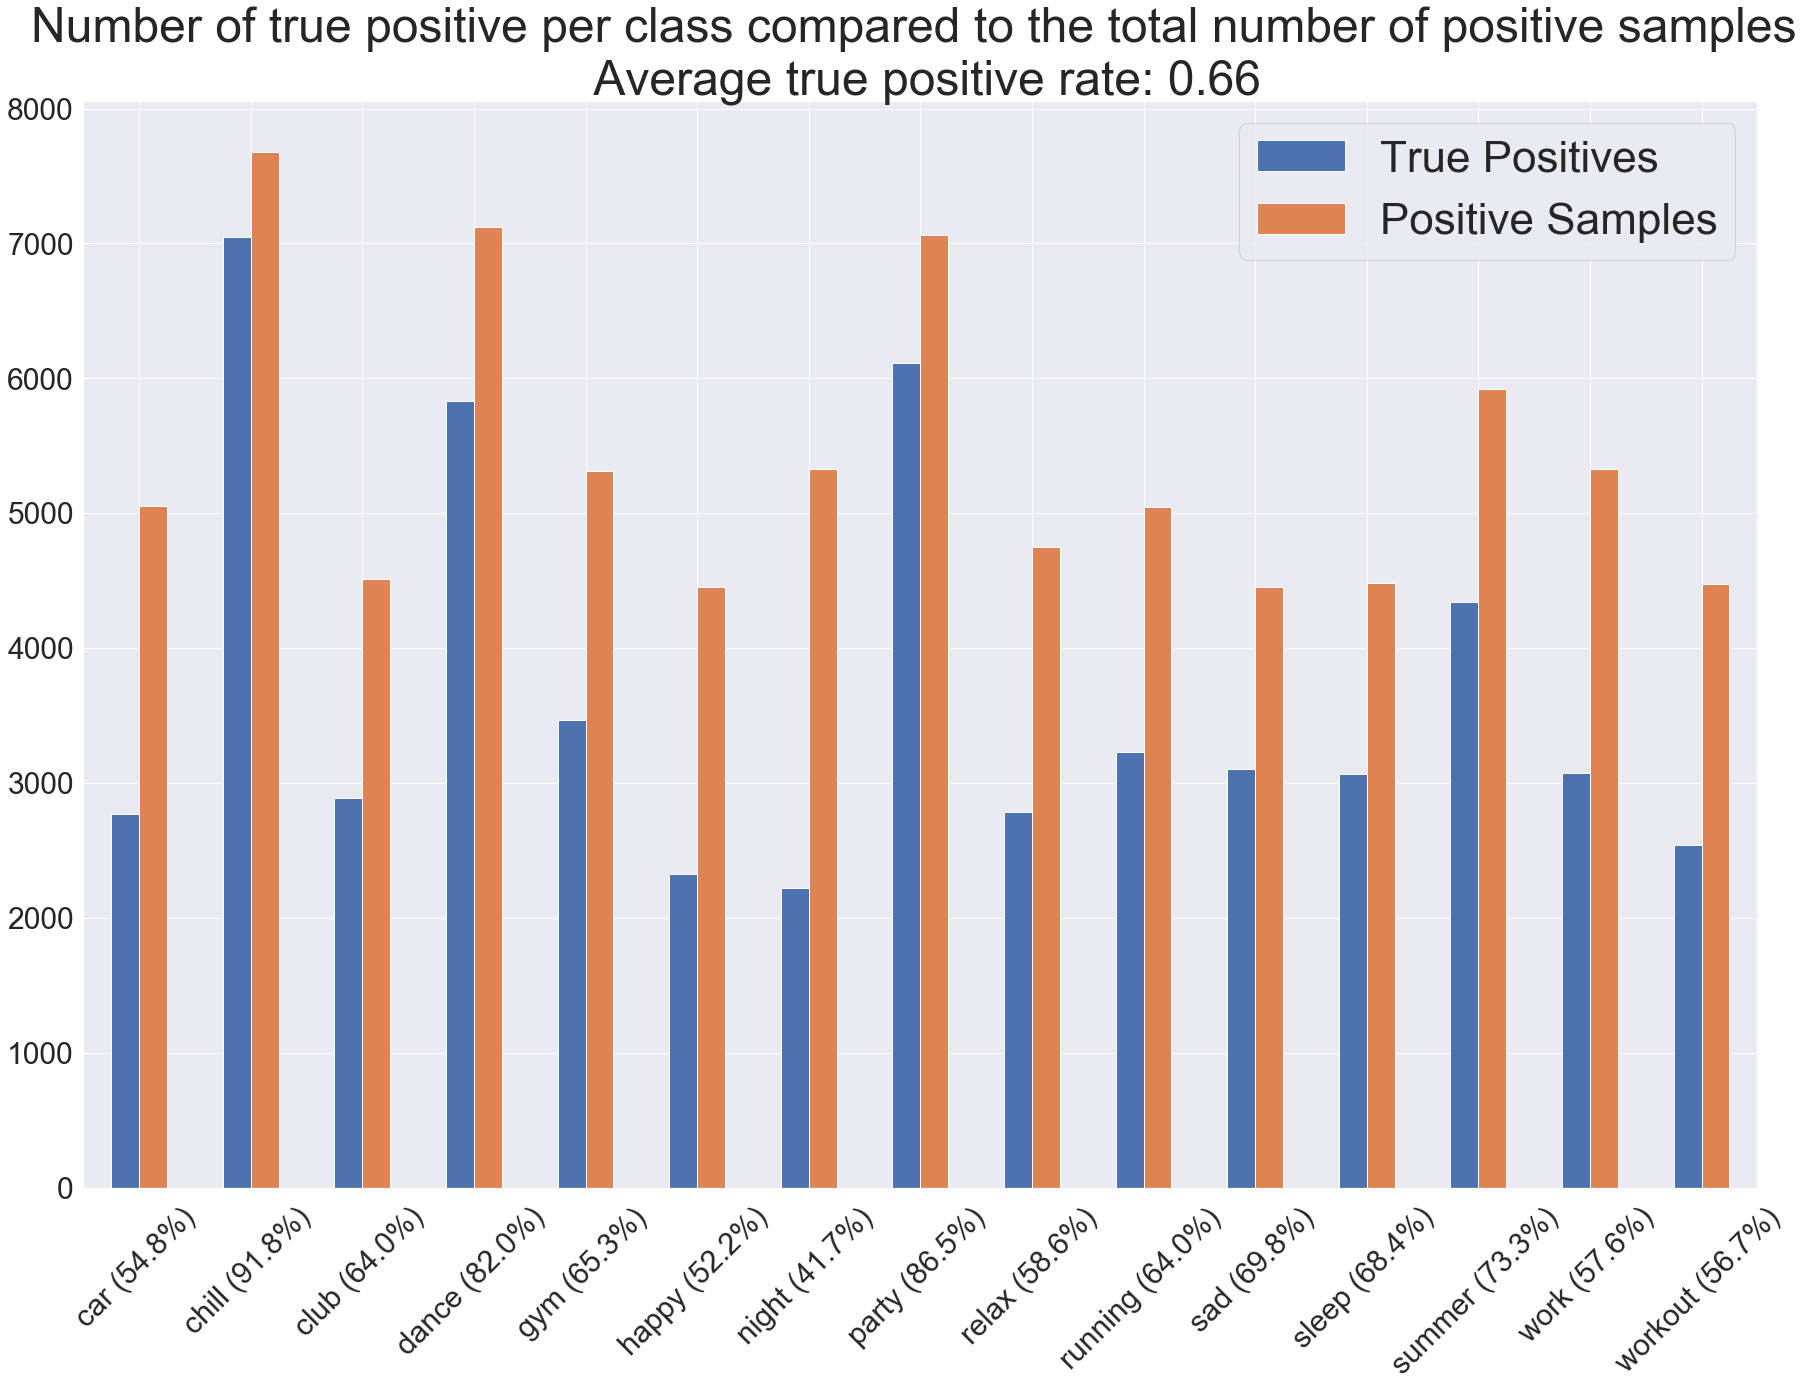

In [258]:
labels = [label + " (" + "{:.1f}".format(true_positives_ratio_perclass[idx]*100) + "%) " for idx , label in enumerate(LABELS_LIST)]
true_positives_df.columns = labels
true_positives_df.T.plot.bar(figsize=(30,20),fontsize = 30)
plt.xticks(rotation=45)
plt.title("Number of true positive per class compared to the total number of positive samples \n Average true positive rate: " + "{:.2f}".format(true_positives_ratio_perclass.mean()) )

In [178]:
# Getting coocuarances
test_pred_df = pd.DataFrame(test_pred,columns=LABELS_LIST)
coocurrances = pd.DataFrame(columns=test_pred_df.columns)
for column in test_pred_df.columns:
    coocurrances[column] = test_pred_df[test_pred_df[column] == 1 ].sum()
coocurrances = coocurrances.T

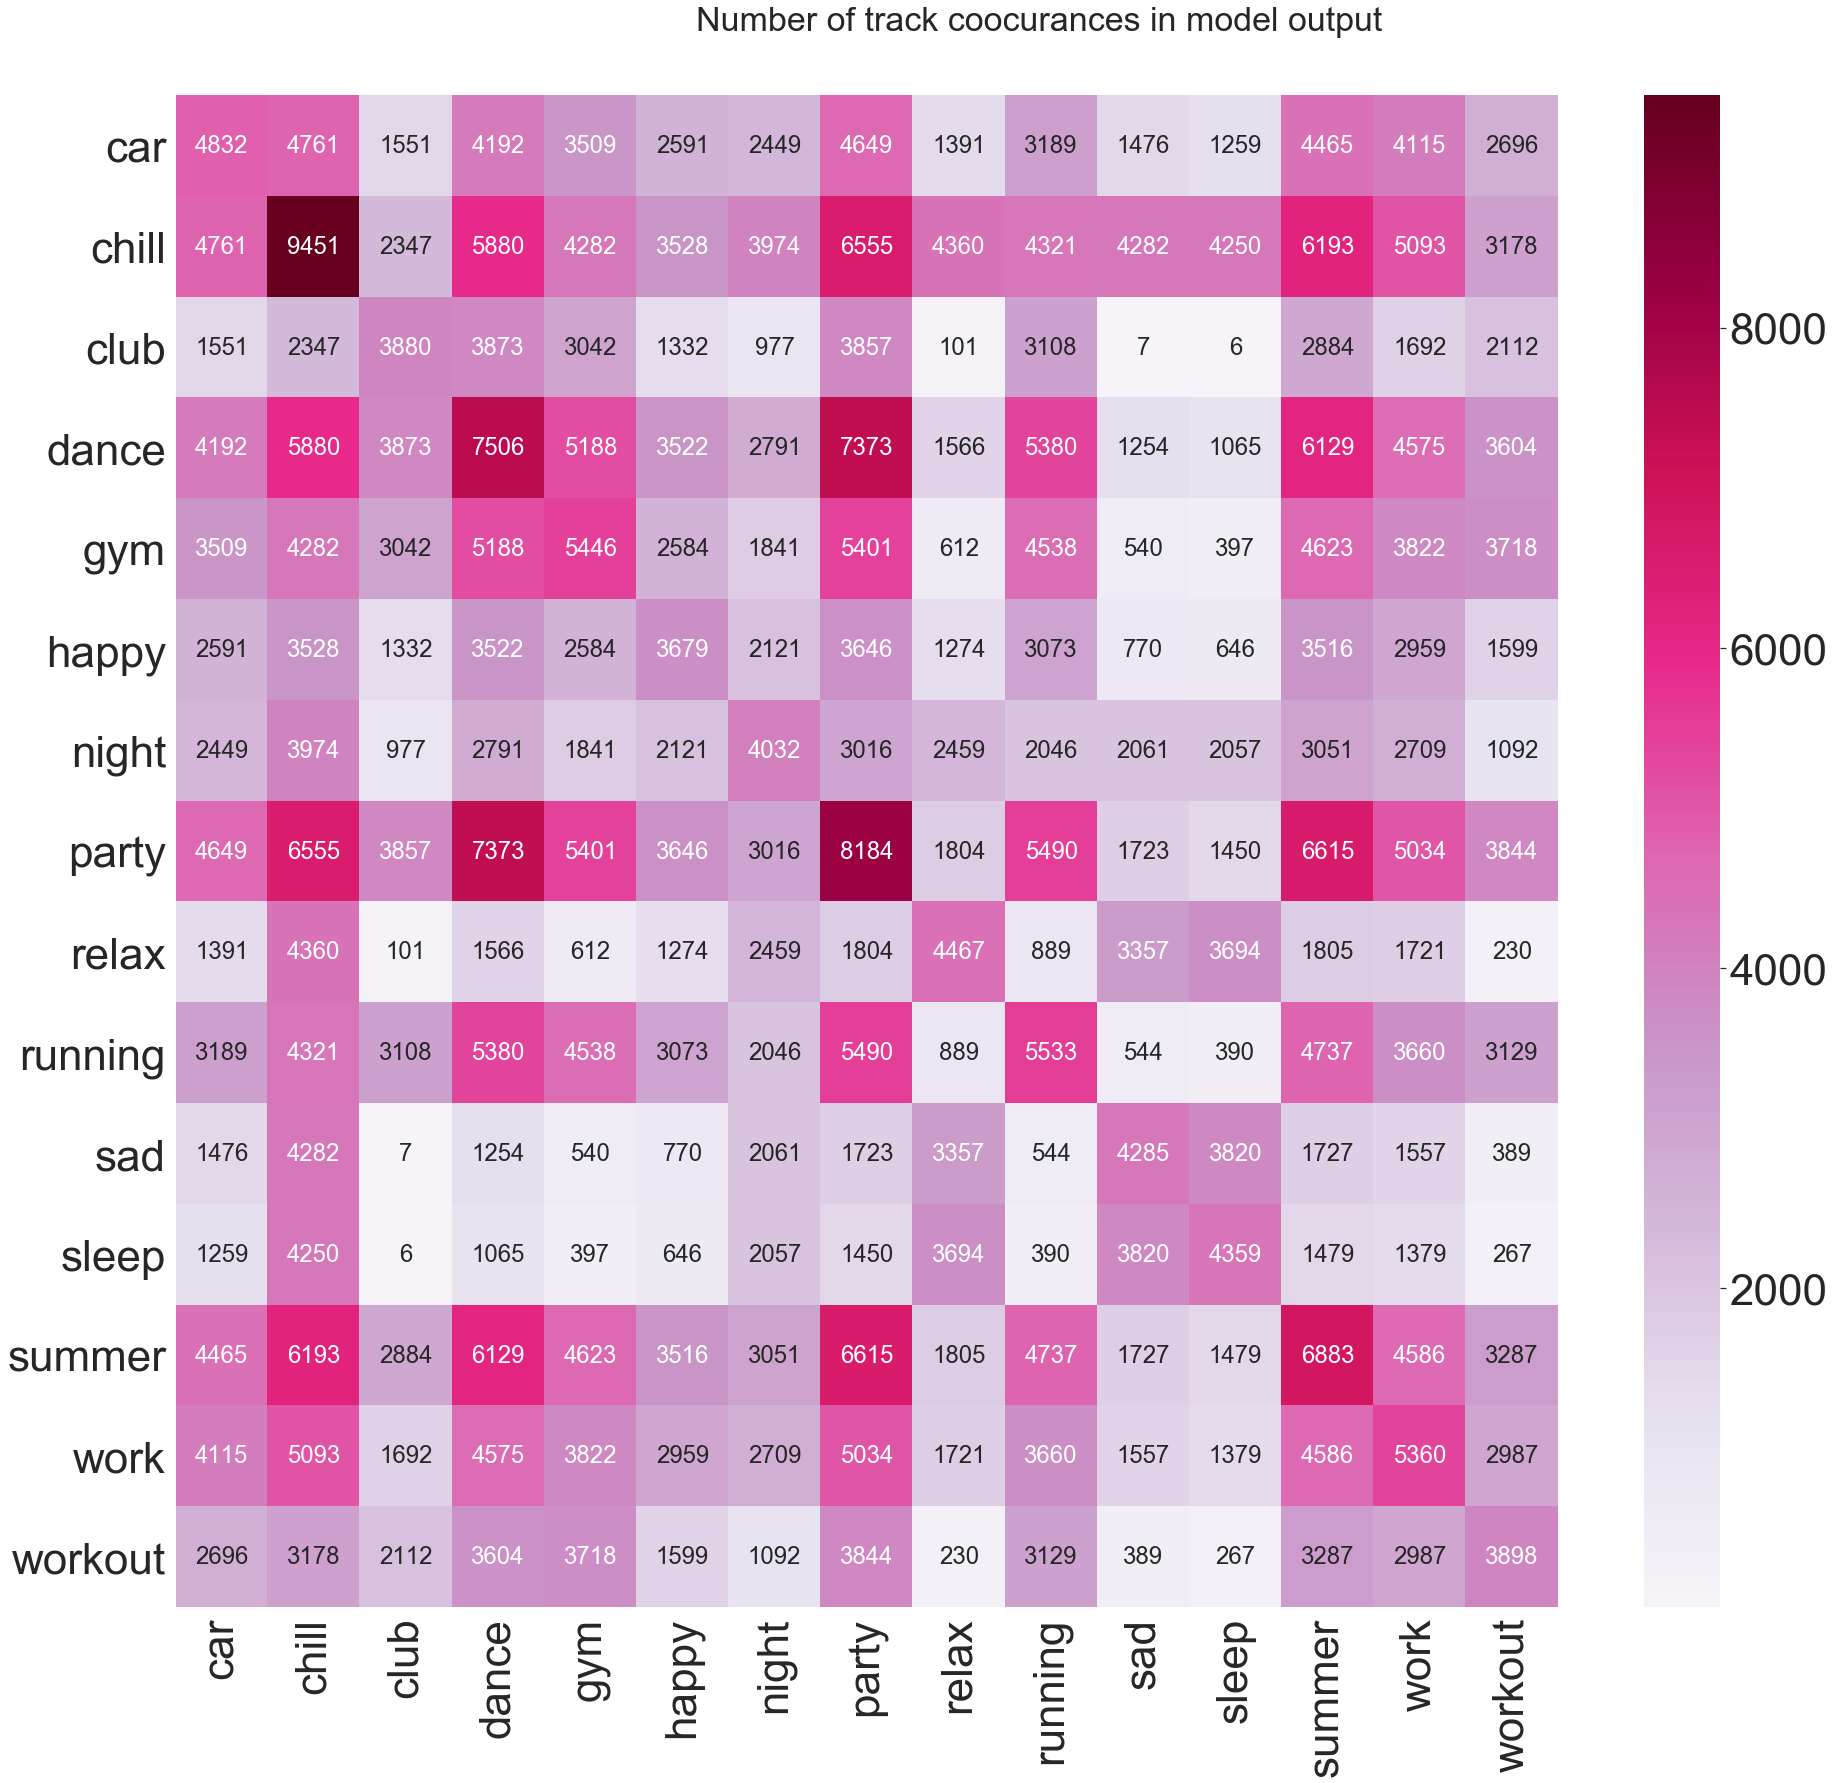

In [194]:
# Plotting coocurances
plt.figure(figsize = (30,30));
sn.set(font_scale=4)#for label size
cmap = 'PuRd'
plt.axes([.1,.1,.8,.7])
plt.figtext(.5,.83,'Number of track coocurances in model output', fontsize=34, ha='center')
#plt.figtext(.5,.81,'The ratio of the tracks in the y-axis context that are also labeled as the x-axis context',fontsize=26,ha='center')
#plt.title("Ratio of tracks shared between contexts",fontdict={"fontsize" : 40})
#plt.suptitle("Numbers show the ratio of the tracks in the y-axis context that are also labeled as the x-axis context")
sn.heatmap(coocurrances, annot=True,annot_kws={"size": 24},fmt='.0f', cmap= cmap);

In [180]:
false_positives_ratio_perclass = sum((test_pred != test_classes) *  (test_classes == 1)) / sum(test_classes)
false_positives_ratio_df = pd.DataFrame(columns= LABELS_LIST)
false_positives_ratio_df.index.astype(str, copy = False)
false_positives_ratio_df.loc[0] = false_positives_ratio_perclass
#false_positives_ratio_df.loc[1] = percentage_of_positives_perclass
false_positives_ratio_df

car     chill     club     dance       gym     happy     night  \
0  0.45183  0.082085  0.35961  0.180247  0.347204  0.477656  0.583302   

      party     relax   running       sad     sleep    summer      work  \
0  0.134683  0.413524  0.359564  0.301955  0.315555  0.267185  0.423611   

    workout  
0  0.432529

In [181]:
# Getting coocuarances
test_pred_df = pd.DataFrame(test_pred,columns=LABELS_LIST)
test_classes_df = pd.DataFrame(test_classes,columns=LABELS_LIST)
FN_coocurrances = pd.DataFrame(columns=test_pred_df.columns)
for column in test_pred_df.columns:
    FN_coocurrances[column] = test_pred_df[[negative_prediction and positive_sample 
                                            for negative_prediction, positive_sample in 
                                            zip(test_pred_df[column] == 0, test_classes_df[column] == 1)]].sum()
FN_coocurrances = FN_coocurrances.T

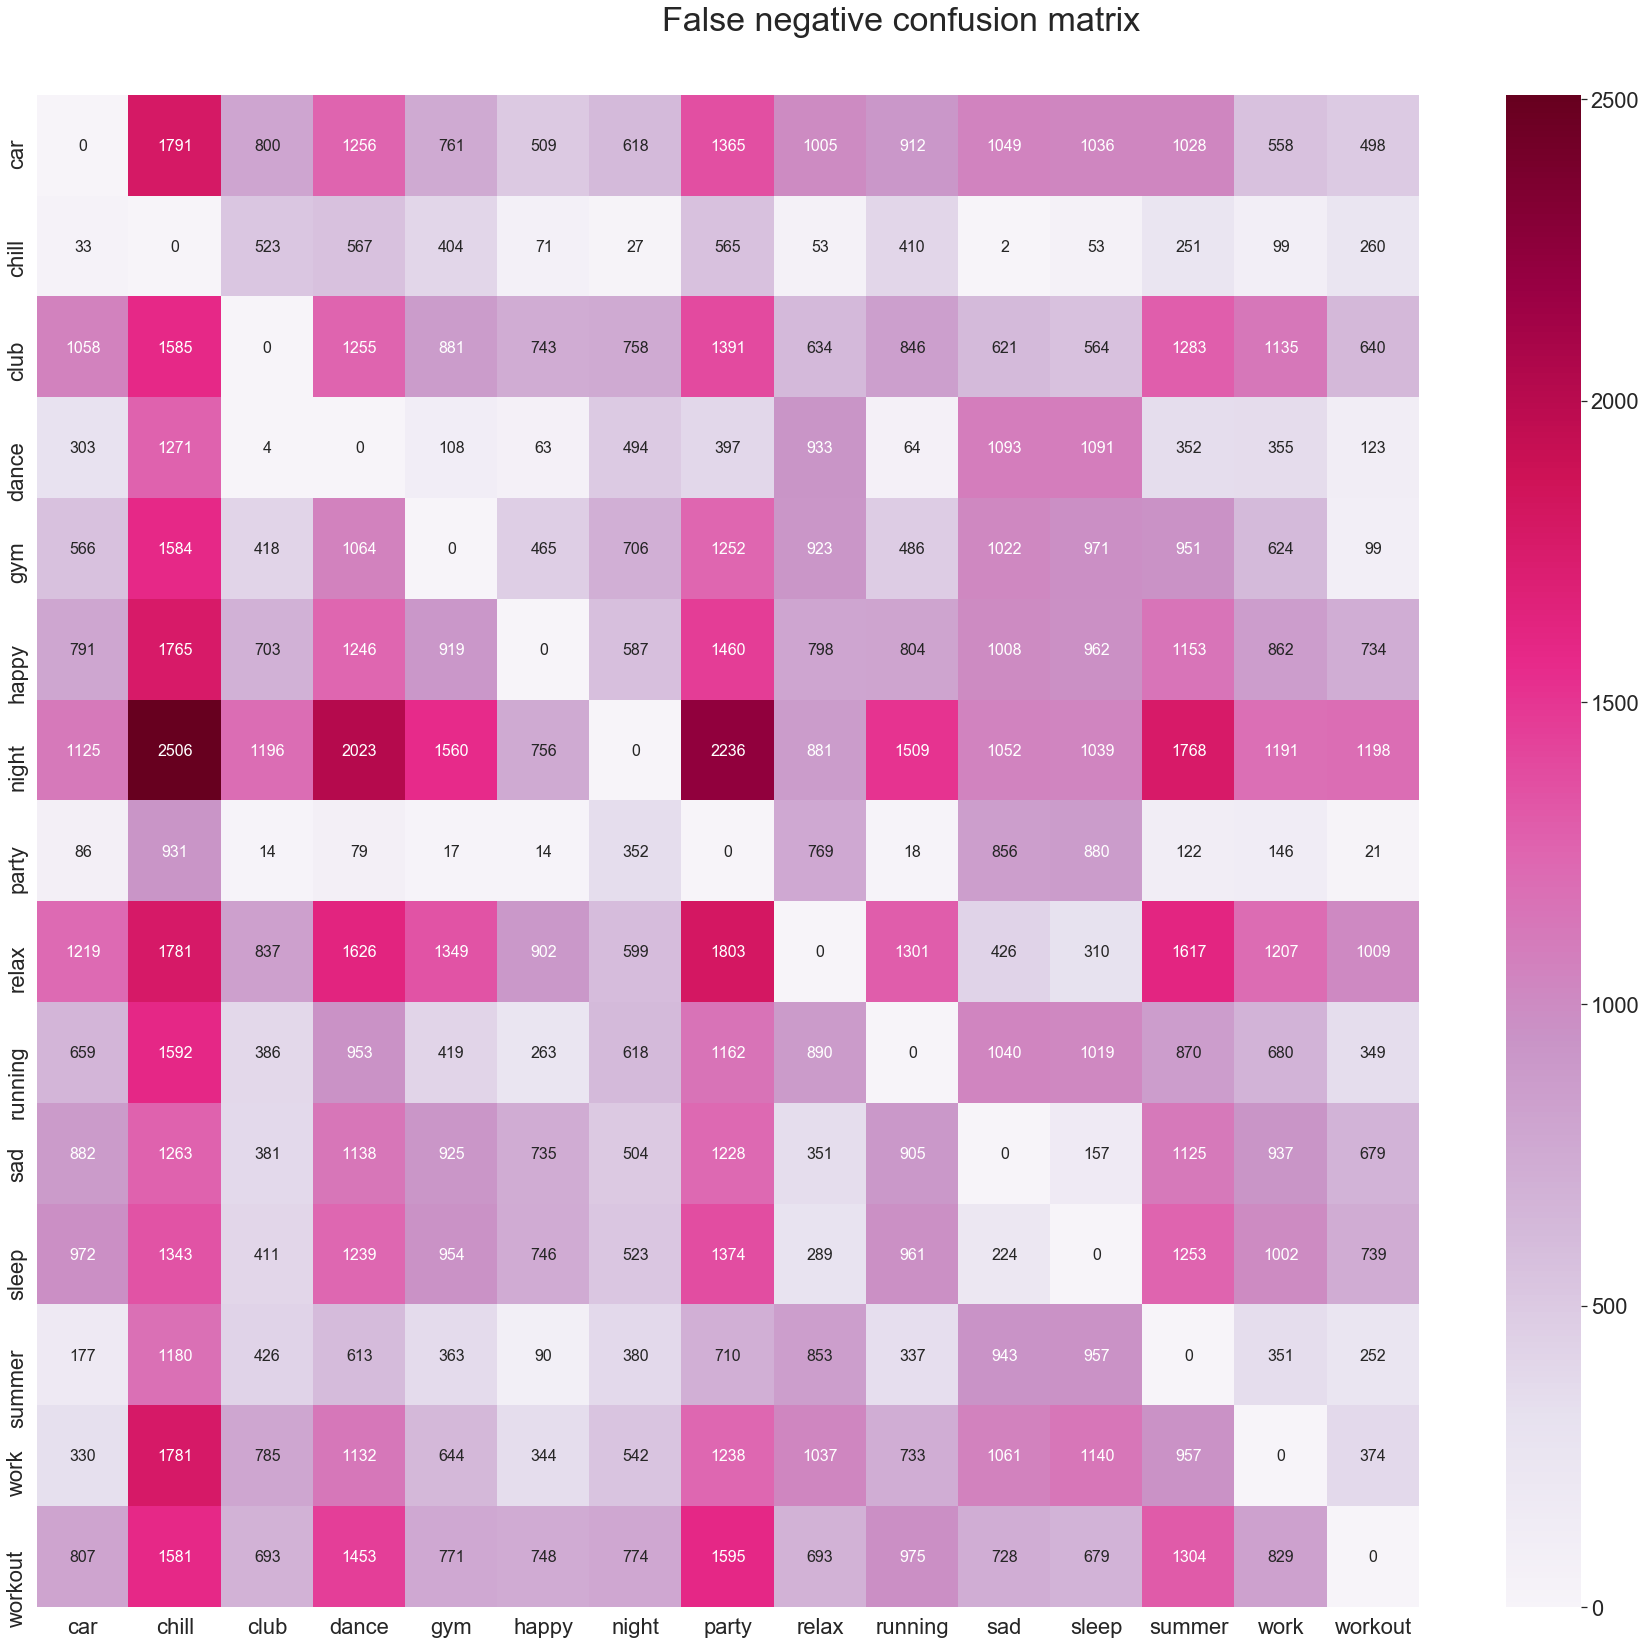

In [182]:
# Plotting coocurances
import seaborn as sn
import matplotlib.pyplot as plt 
plt.figure(figsize = (30,30));
sn.set(font_scale=2)#for label size
cmap = 'PuRd'
plt.axes([.1,.1,.8,.7])
plt.figtext(.5,.83,'False negative confusion matrix', fontsize=34, ha='center')
#plt.figtext(.5,.81,'The ratio of the tracks in the y-axis context that are also labeled as the x-axis context',fontsize=26,ha='center')
#plt.title("Ratio of tracks shared between contexts",fontdict={"fontsize" : 40})
#plt.suptitle("Numbers show the ratio of the tracks in the y-axis context that are also labeled as the x-axis context")
sn.heatmap(FN_coocurrances, annot=True,annot_kws={"size": 16},fmt='.0f', cmap= cmap);

In [186]:
true_positives_ratio_perclass.mean()

0.6579640498985764

In [203]:
# Getting coocuarances
test_classes_df = pd.DataFrame(test_classes,columns=LABELS_LIST)
coocurrances = pd.DataFrame(columns=test_classes_df.columns)
for column in test_classes_df.columns:
    coocurrances[column] = test_classes_df[test_classes_df[column] == 1].sum()
coocurrances = coocurrances.T

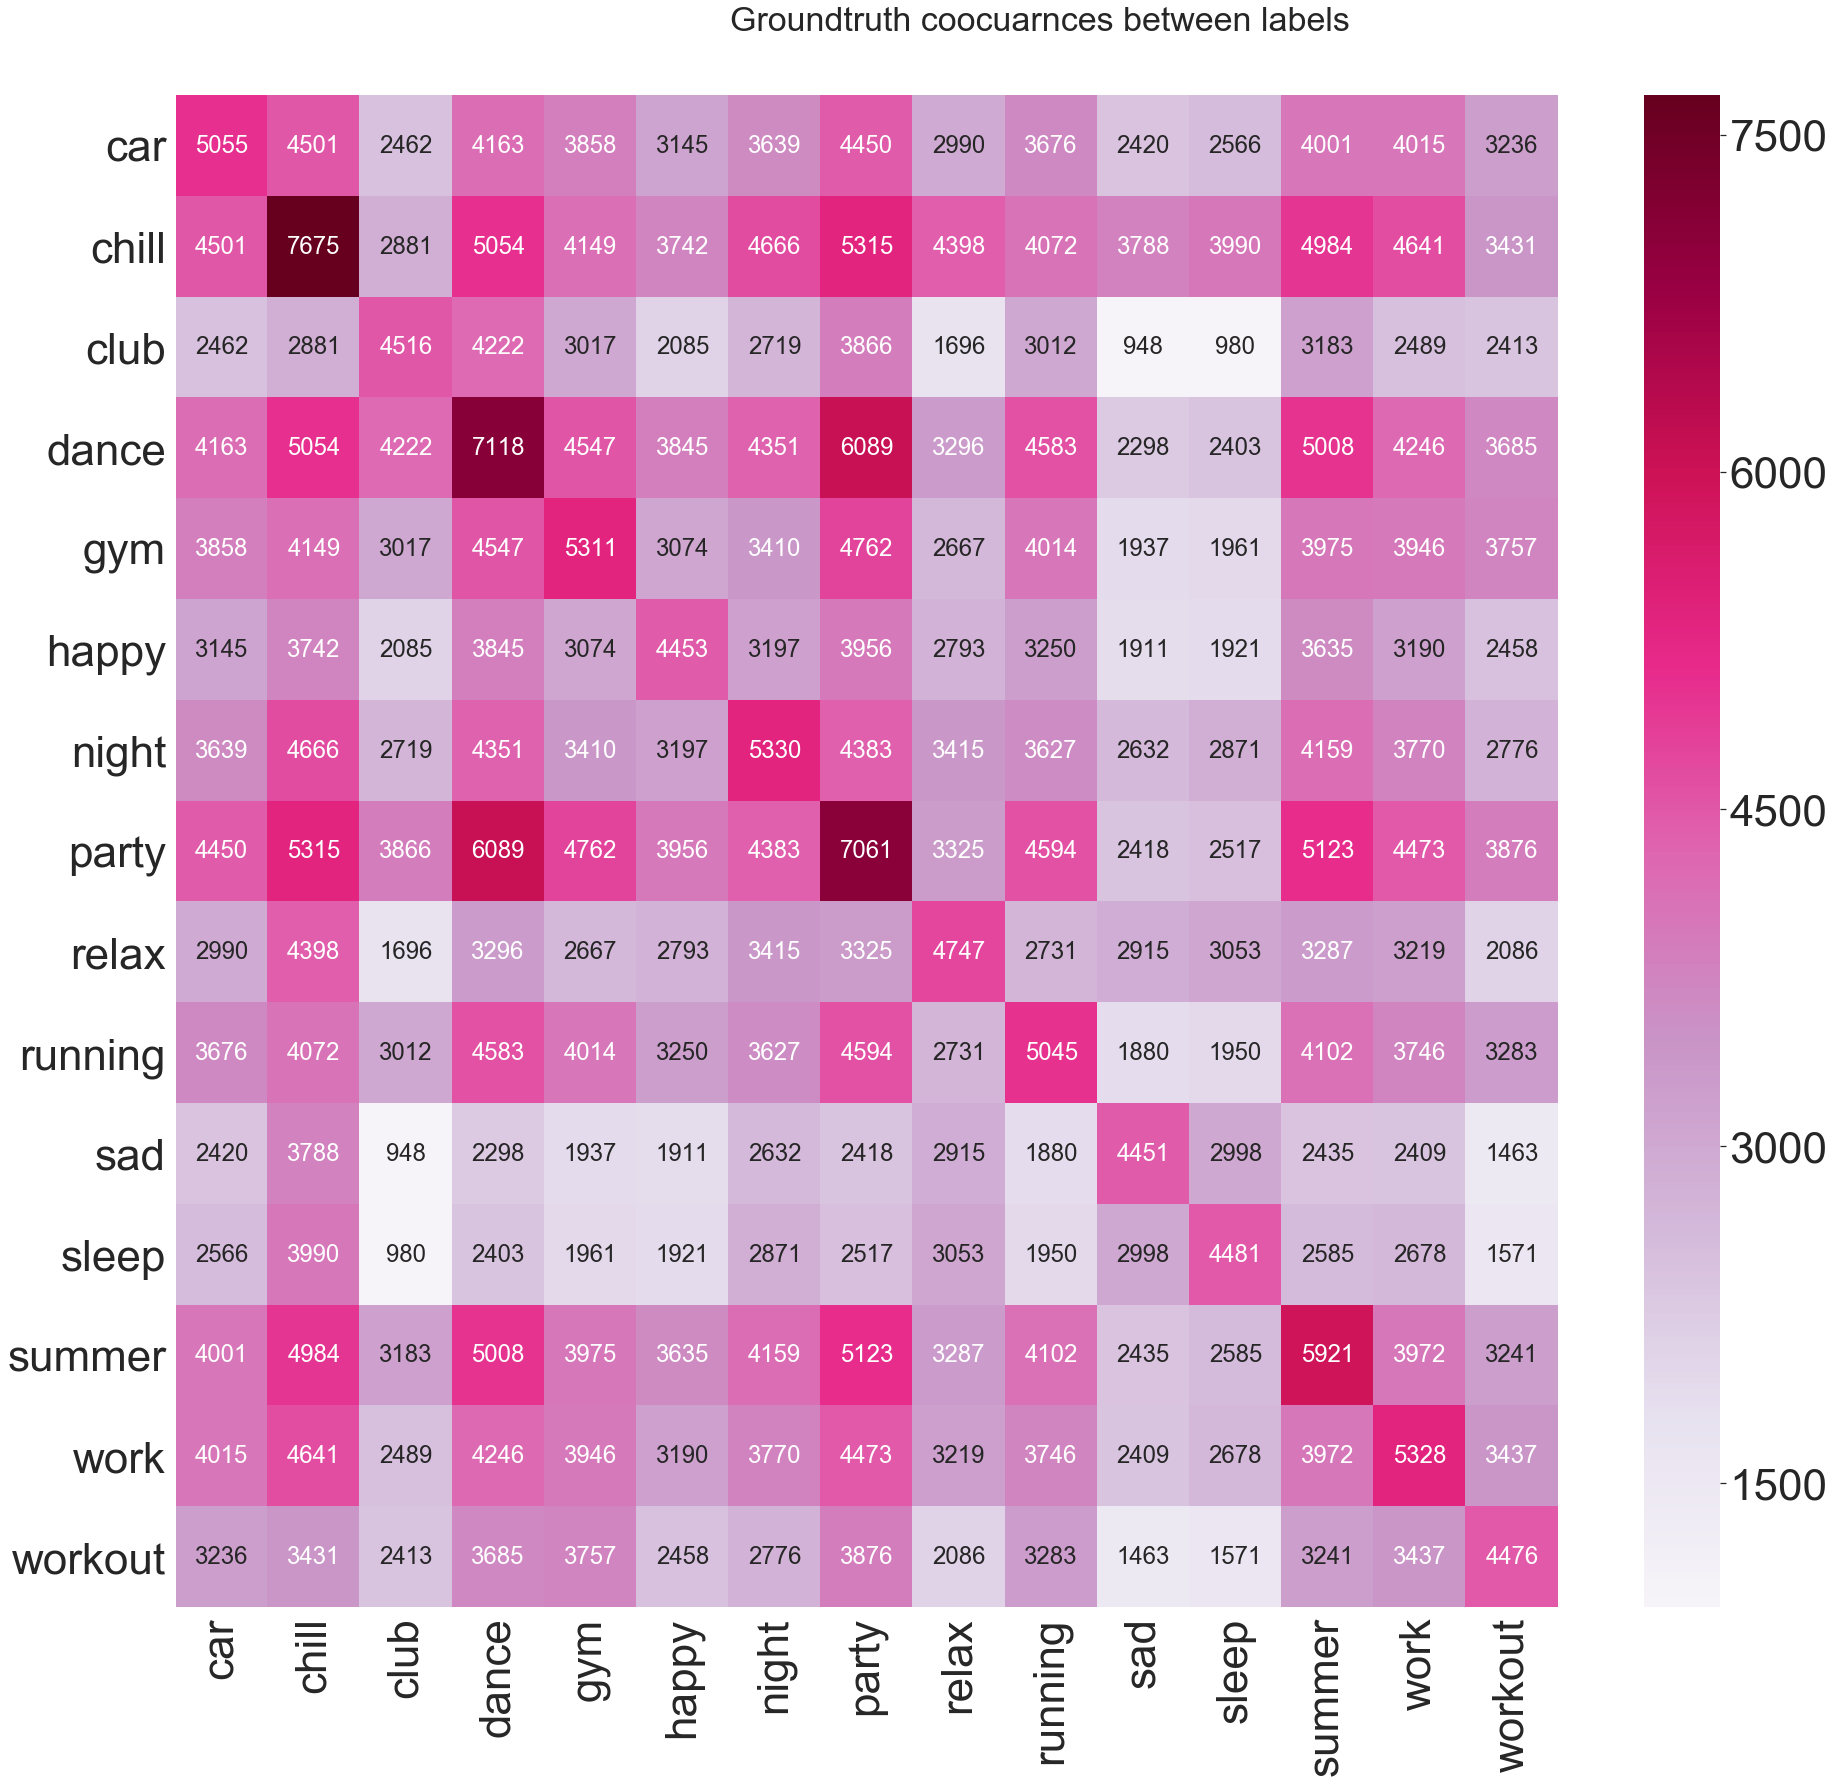

In [207]:
# Plotting coocurances
import seaborn as sn
import matplotlib.pyplot as plt 
plt.figure(figsize = (30,30));
sn.set(font_scale=4)#for label size
cmap = 'PuRd'
plt.axes([.1,.1,.8,.7])
plt.figtext(.5,.83,'Groundtruth coocuarnces between labels', fontsize=34, ha='center')
#plt.figtext(.5,.81,'The ratio of the tracks in the y-axis context that are also labeled as the x-axis context',fontsize=26,ha='center')
#plt.title("Ratio of tracks shared between contexts",fontdict={"fontsize" : 40})
#plt.suptitle("Numbers show the ratio of the tracks in the y-axis context that are also labeled as the x-axis context")
sn.heatmap(coocurrances, annot=True,annot_kws={"size": 24},fmt='.0f', cmap= cmap);

## Changing threshold

In [11]:
# Get the optimum thresholds from the validation set predictions
test_pred_prob = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/C4_square/2019-07-02_10-30-38/'
                                         , 'validpredictions.out'), delimiter=',')

test_classes = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/C4_square/2019-07-02_10-30-38/',
                                       'valid_ground_truth_classes.txt'), delimiter=',')

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,f1_score
auc_roc_per_label = roc_auc_score(test_classes, test_pred_prob, average = None) 

In [13]:
auc_roc_per_label_df = pd.DataFrame(auc_roc_per_label.reshape(1,15))
auc_roc_per_label_df.columns = LABELS_LIST
auc_roc_per_label_df

car     chill      club     dance       gym     happy    night  \
0  0.652139  0.722812  0.834257  0.798286  0.720976  0.717823  0.56916   

      party     relax  running      sad     sleep    summer      work  \
0  0.753878  0.722096  0.68428  0.83957  0.821204  0.677401  0.631412   

    workout  
0  0.787286

Text(0.5, 1.0, 'AUC value per class')

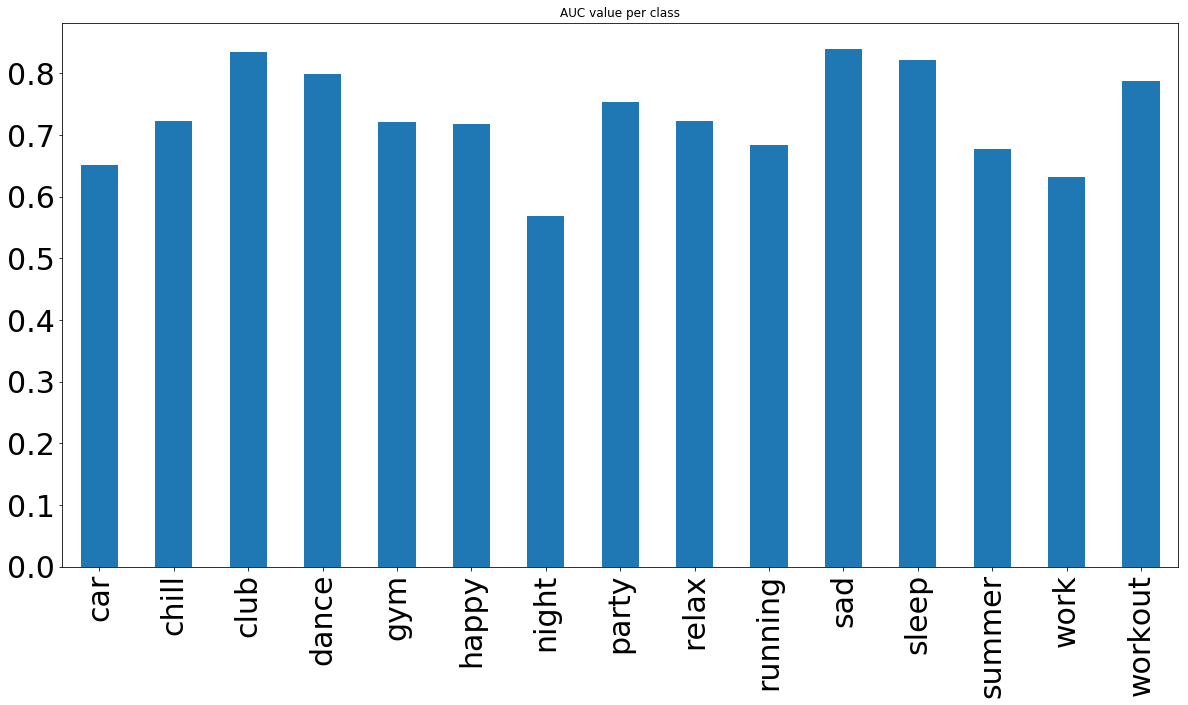

In [14]:
auc_roc_per_label_df.T.plot.bar(figsize=(20,10),fontsize = 30,legend=False)
plt.title("AUC value per class")

In [15]:
thresholds = np.arange(0,1,0.01)
f1_array = np.zeros((len(LABELS_LIST),len(thresholds)))
for idx, label in enumerate(LABELS_LIST):
    f1_array[idx,:] = [f1_score(test_classes[:,idx], np.round(test_pred_prob[:,idx]-threshold+0.5)) 
                       for threshold in thresholds]

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5, 1.0, 'F1 Score vs different prediction threshold values for each class')

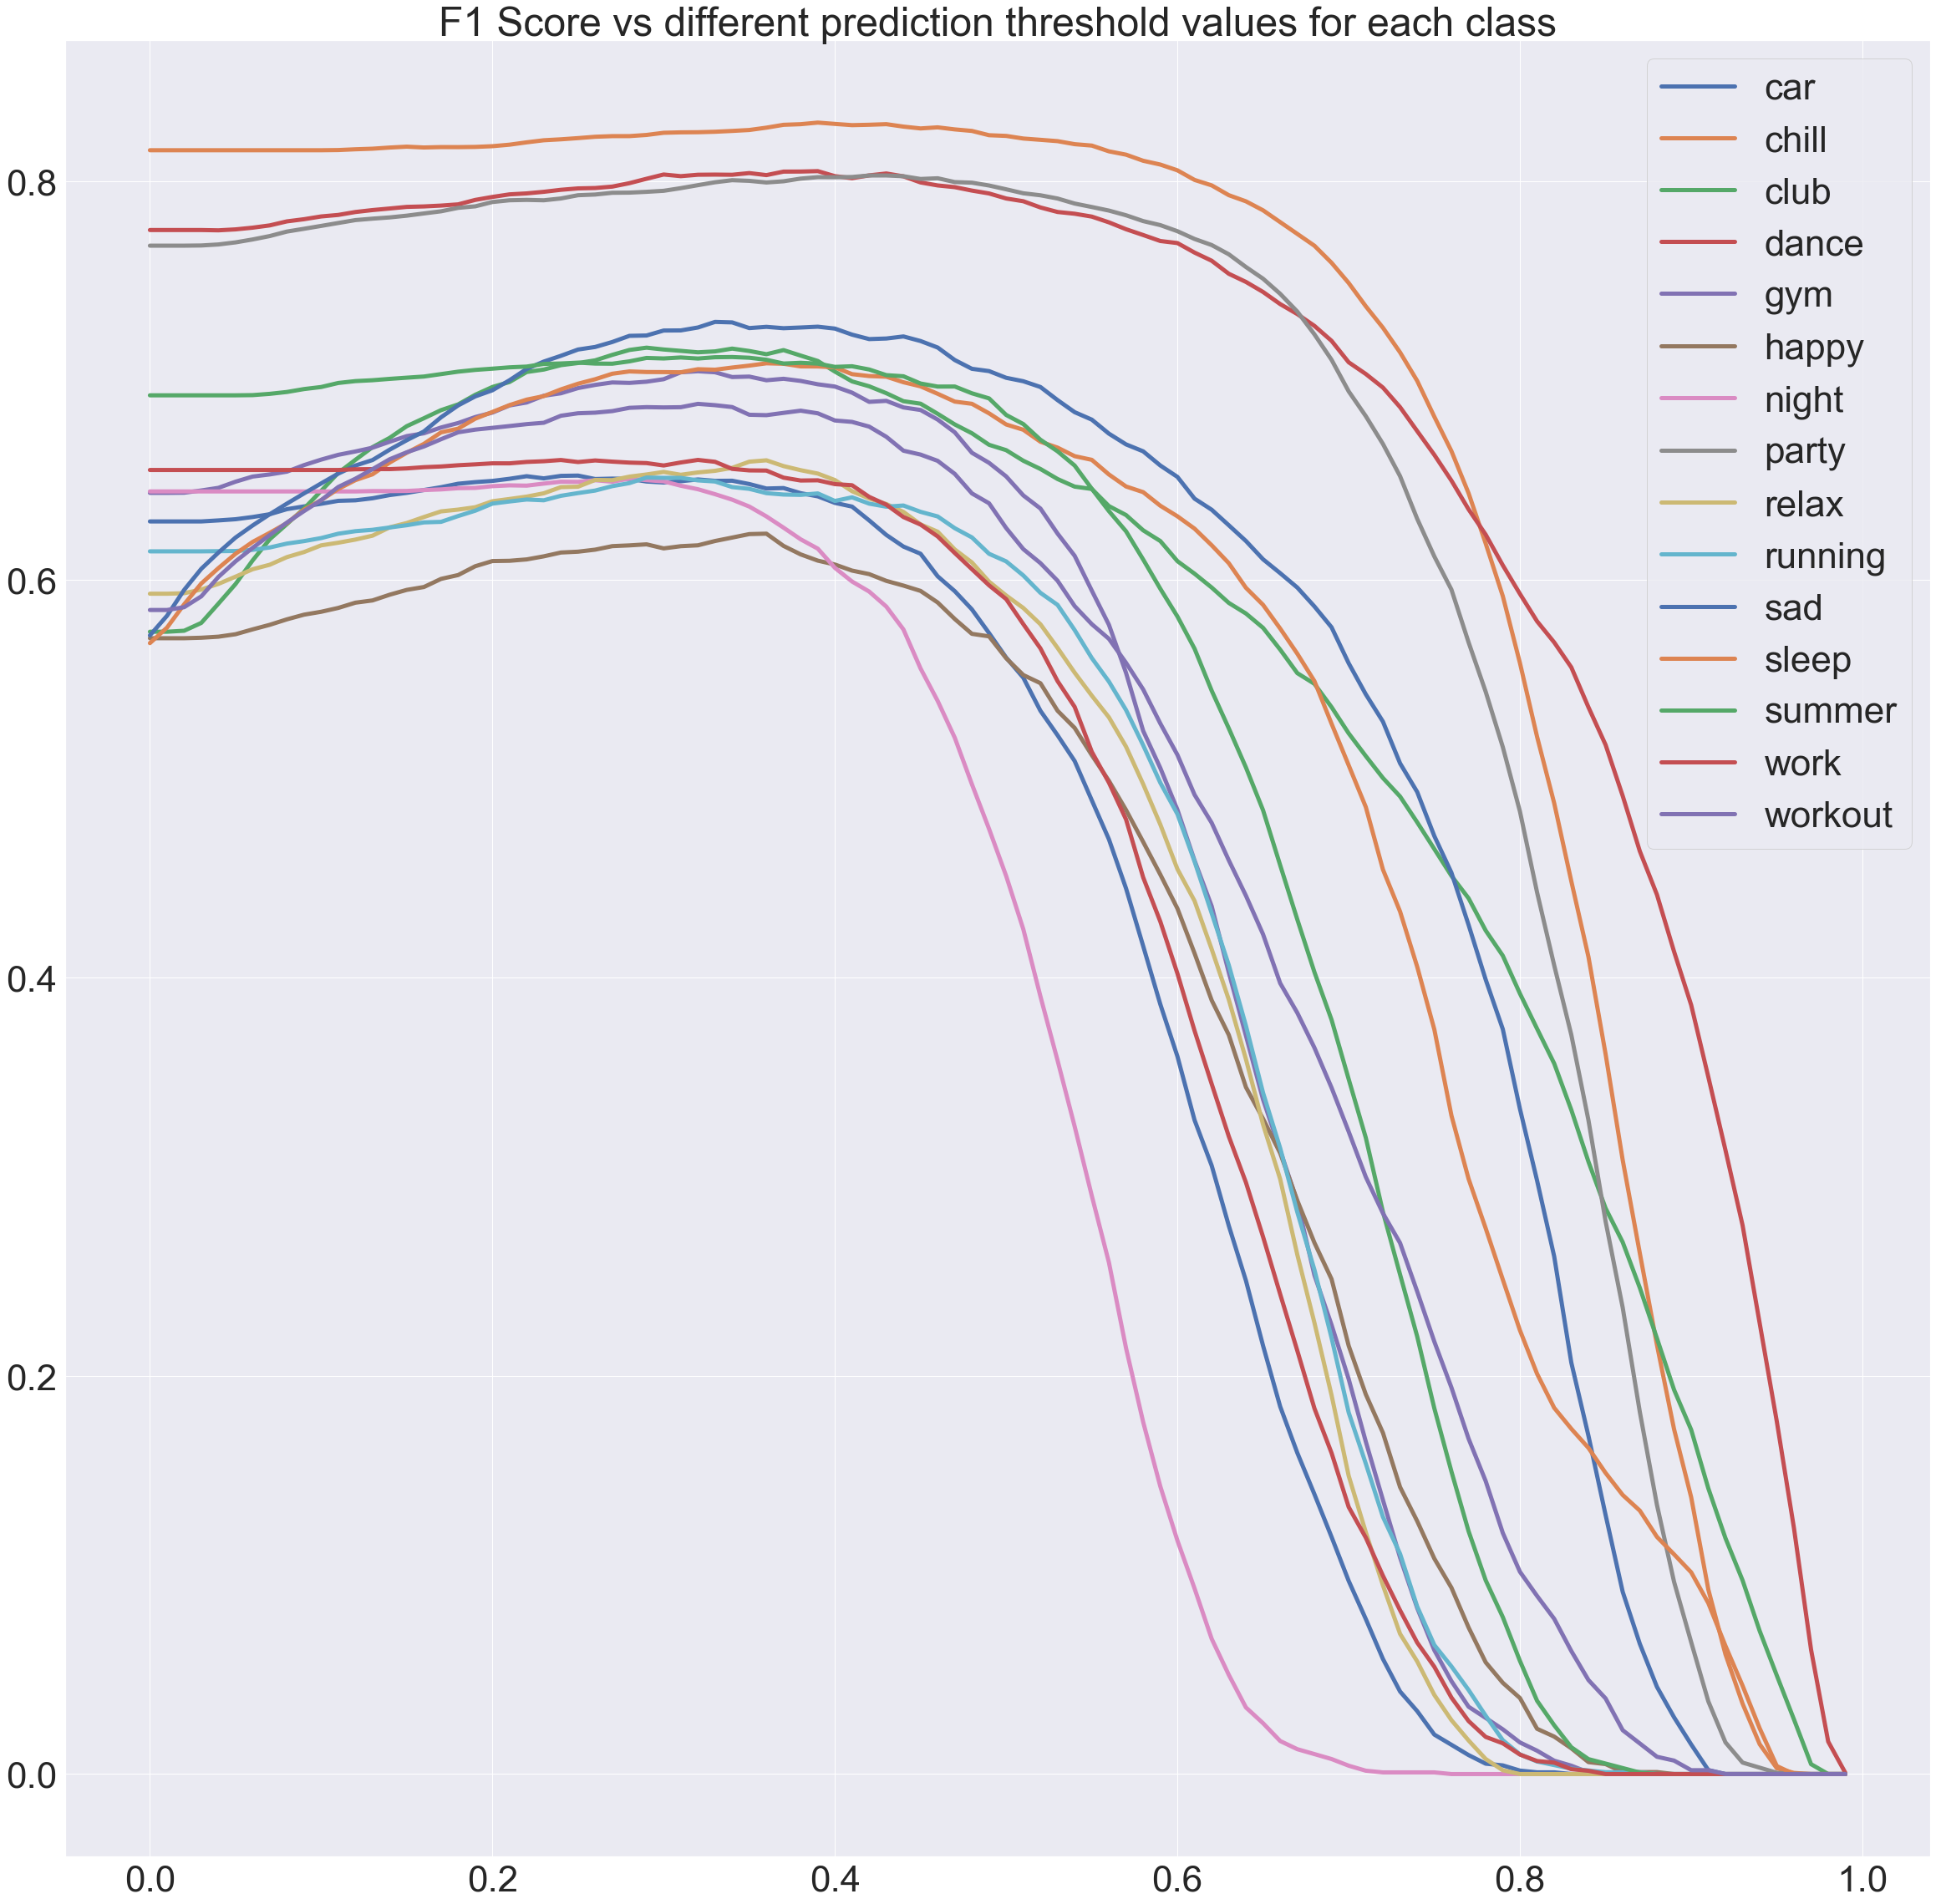

In [22]:
plt.figure(figsize=(40,40))
for idx, x in enumerate(LABELS_LIST):
    plt.plot(thresholds,f1_array[idx,:], linewidth=5)
plt.legend(LABELS_LIST,loc='best')
plt.title("F1 Score vs different prediction threshold values for each class")

In [23]:
threshold_arg = np.argmax(f1_array,axis = 1)
threshold_per_class = thresholds[threshold_arg]

In [24]:
# Now load the actual test set to evaluate the new thresholds
test_pred_prob = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/C4_square/2019-07-02_10-30-38/'
                                         , 'predictions.out'), delimiter=',')

test_classes = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/C4_square/2019-07-02_10-30-38/',
                                       'test_ground_truth_classes.txt'), delimiter=',')

In [25]:
test_pred = np.zeros_like(test_pred_prob)
for idx,label in enumerate(LABELS_LIST): 
    test_pred[:,idx] = np.round(test_pred_prob[:,idx]-threshold_per_class[idx]+0.5)

In [26]:
accuracies_perclass = sum(test_pred == test_classes) / len(test_classes)
accuracies_df = pd.DataFrame(columns= LABELS_LIST)
accuracies_df.index.astype(str, copy = False)
accuracies_df.loc[0] = accuracies_perclass

In [27]:
percentage_of_positives_perclass = sum(test_classes) / len(test_classes)
accuracies_df.loc[1] = percentage_of_positives_perclass
accuracies_df.index = ['Model Accuracy' , 'Ratio of Positive Samples']

In [28]:
accuracies_df

car     chill      club     dance       gym  \
Model Accuracy             0.527506  0.720491  0.727346  0.732865  0.641001   
Ratio of Positive Samples  0.449973  0.683194  0.401994  0.633612  0.472761   

                              happy     night     party     relax   running  \
Model Accuracy             0.640466  0.501691  0.730995  0.653107  0.576998   
Ratio of Positive Samples  0.396386  0.474453  0.628538  0.422557  0.449083   

                                sad     sleep    summer      work   workout  
Model Accuracy             0.745950  0.745416  0.602279  0.518159  0.677764  
Ratio of Positive Samples  0.396208  0.398878  0.527061  0.474275  0.398433

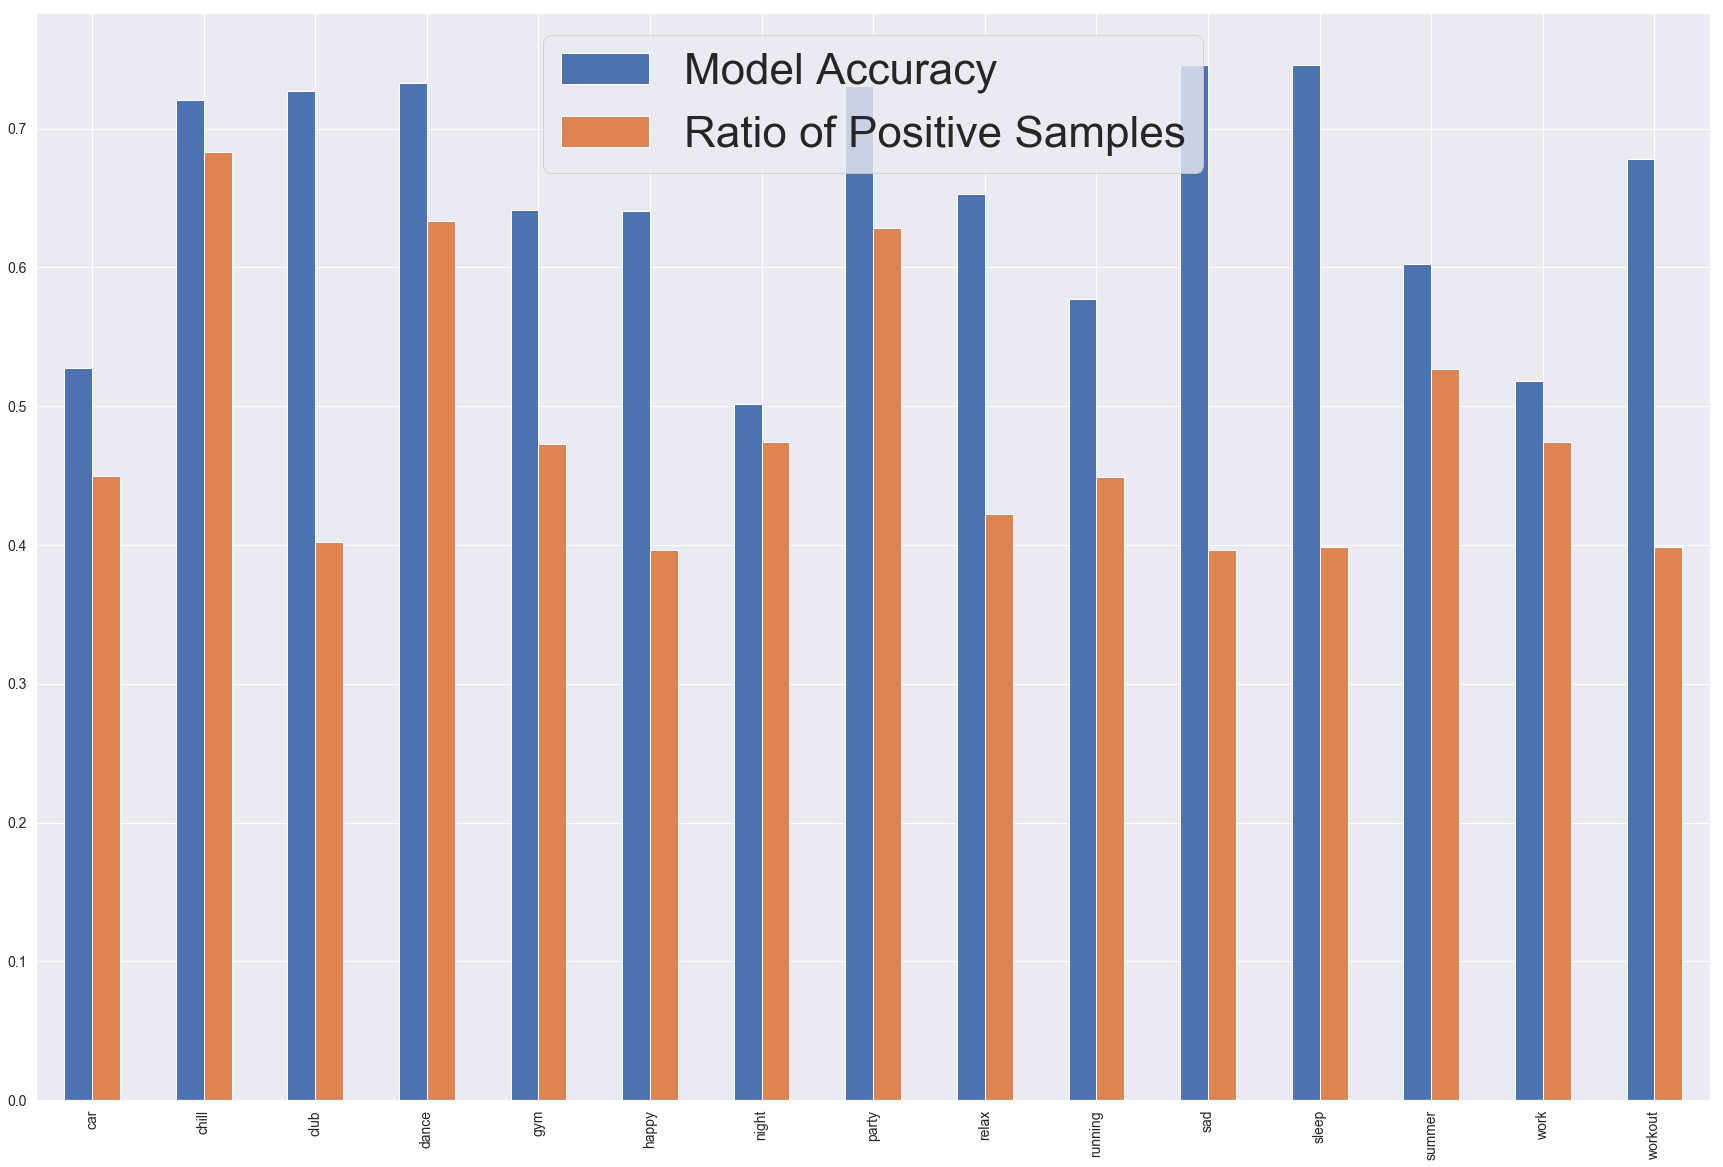

In [439]:
accuracies_df.T.plot.bar(figsize=(30,20),fontsize = 14)


In [29]:
true_positives_ratio_perclass = sum((test_pred == test_classes) *  (test_classes == 1)) / sum(test_classes)
true_positives_ratio_df = pd.DataFrame(columns= LABELS_LIST)
true_positives_ratio_df.index.astype(str, copy = False)
true_positives_ratio_df.loc[0] = true_positives_ratio_perclass
true_positives_ratio_df.loc[1] = percentage_of_positives_perclass
true_positives_ratio_df.index = ['True positives ratio (TP/sum of positive samples)', 'Ratio of Positive Samples']
true_positives_ratio_df

car     chill  \
True positives ratio (TP/sum of positive samples)  0.945005  0.959739   
Ratio of Positive Samples                          0.449973  0.683194   

                                                       club     dance  \
True positives ratio (TP/sum of positive samples)  0.861825  0.906856   
Ratio of Positive Samples                          0.401994  0.633612   

                                                        gym     happy  \
True positives ratio (TP/sum of positive samples)  0.893429  0.768246   
Ratio of Positive Samples                          0.472761  0.396386   

                                                      night     party  \
True positives ratio (TP/sum of positive samples)  0.956473  0.905113   
Ratio of Positive Samples                          0.474453  0.628538   

                                                      relax   running  \
True positives ratio (TP/sum of positive samples)  0.791447  0.924678   
Ratio of Positive Samples                          0.422557  0.449083   

                                                        sad     sleep  \
True positives ratio (TP/sum of positive samples)  0.852393  0.820576   
Ratio of Positive Samples                          0.396208  0.398878   

                                                     summer      work  \
True positives ratio (TP/sum of positive samples)  0.925519  0.934872   
Ratio of Positive Samples                          0.527061  0.474275   

                                                    workout  
True positives ratio (TP/sum of positive samples)  0.825067  
Ratio of Positive Samples                          0.398433

In [33]:
true_positives_perclass = sum((test_pred == test_classes) *  (test_classes == 1))
true_positives_df = pd.DataFrame(columns= LABELS_LIST)
true_positives_df.index.astype(str, copy = False)
true_positives_df.loc[0] = true_positives_perclass
f1_score_perclass = f1_score(test_classes, test_pred,average=None)

percentage_of_positives_perclass = sum(test_classes)
true_positives_df.loc[1] = percentage_of_positives_perclass
true_positives_df.index = ['True Positives' , 'Positive Samples']

Text(0.5, 1.0, 'Number of true positive per class compared to the total number of positive samples \n Average true positive rate: 0.88')

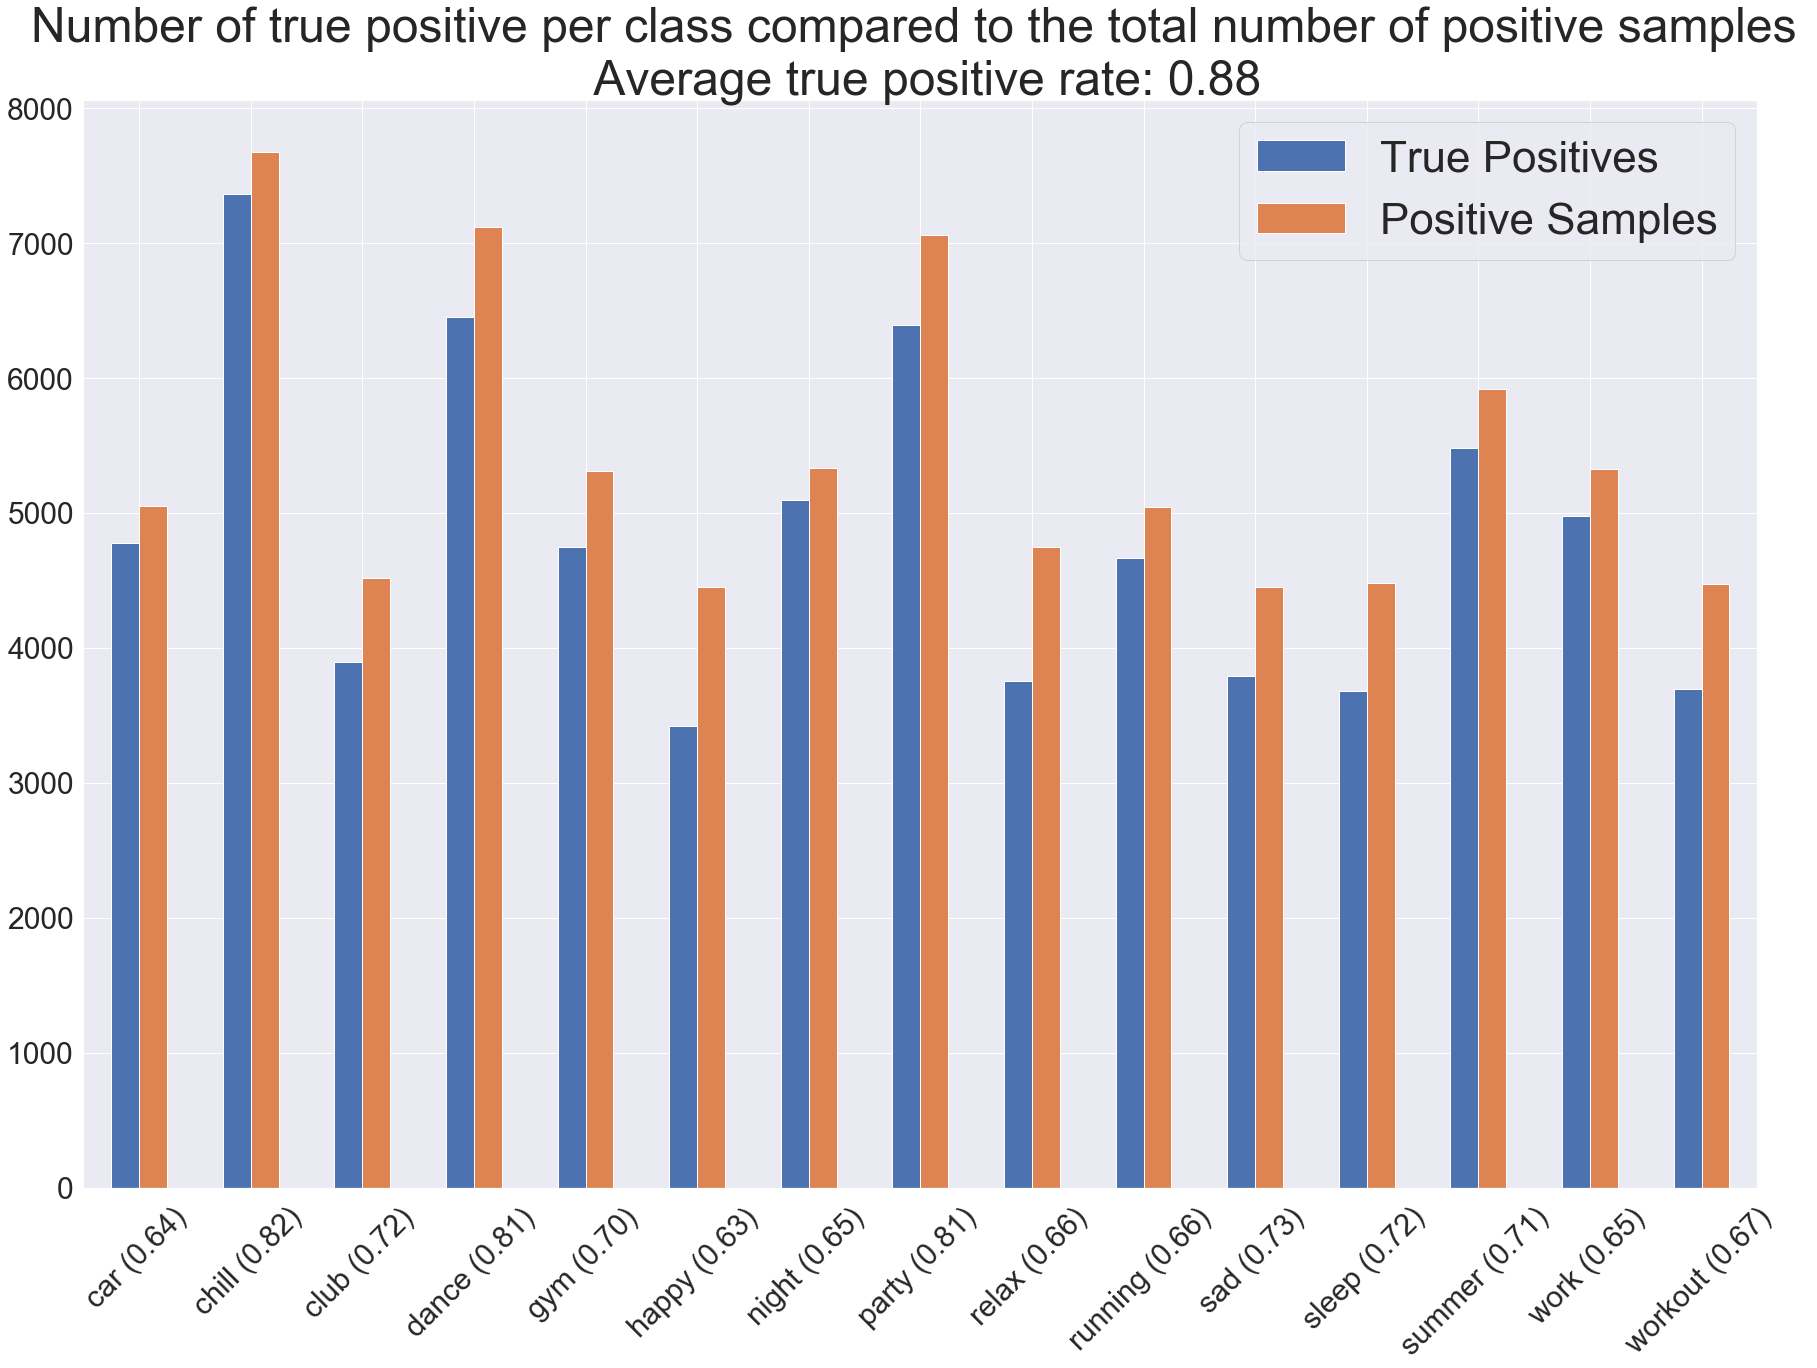

In [37]:
labels = [label + " (" + "{:.2f}".format(f1_score_perclass[idx]) + ") " for idx , label in enumerate(LABELS_LIST)]
true_positives_df.columns = labels
true_positives_df.T.plot.bar(figsize=(30,20),fontsize = 30)
plt.xticks(rotation=45)
plt.title("Number of true positive per class compared to the total number of positive samples \n Average true positive rate: " + "{:.2f}".format(true_positives_ratio_perclass.mean()) )

In [415]:
sum(test_pred)/len(test_pred)

array([0.8729749 , 0.90154887, 0.55109489, 0.82036674, 0.69983977,
       0.59275414, 0.90813602, 0.79891401, 0.61082428, 0.79428521,
       0.51139398, 0.51949439, 0.83469824, 0.96590707, 0.60379206])